<a href="https://colab.research.google.com/github/huricane85/FPL-API-Fixture-modeler/blob/main/FPL_Model%20%2027.02.2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/doughagey/UnderstatScraper

Cloning into 'UnderstatScraper'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 11), reused 25 (delta 2), pack-reused 0
Receiving objects: 100% (34/34), 268.30 KiB | 10.73 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1 17:50:36 2020
@author: doug hagey
"""

import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '310',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    #player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    if weeks != '1wks':
        player_df.drop(['position','team_title'], axis=1, inplace=True)
    return(player_df)

#Creprint('Getting data for last 1 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '26'})
one_game_table = pd.DataFrame(json_player_data)
one_game_df = clean_df(one_game_table,'6wks')


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 1 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '26'})
one_game_table = pd.DataFrame(json_player_data)
one_game_df = clean_df(one_game_table, '1wks')

print('Merging Tables')
EPL_player_df = pd.merge(one_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, one_game_df, on=['id','player_name'])


print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined 2021.csv', encoding='utf-8', index=False)


Getting data for the whole season
Getting data for last 1 matches
Merging Tables
Writing CSV File


In [4]:
EPL_player_df = EPL_player_df.round(2)
EPL_player_df

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup
0,8260,Erling Haaland,21,1759,17,21.168554455041885,5,3.889001840725541,87,22,...,87,22,1,0,F S,Manchester City,14,18.12387928366661,21.35706026107073,1.9017212595790625
1,1250,Mohamed Salah,21,1815,15,14.35135069489479,9,10.167602833360434,67,49,...,67,49,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894
2,1679,Dominic Solanke,25,2243,14,15.485817518085241,3,2.279703486710787,79,23,...,79,23,2,0,F,Bournemouth,13,14.724648665636778,15.772489465773106,2.205134676769376
3,1776,Jarrod Bowen,25,2250,14,10.528724770992994,2,3.410887574777007,63,17,...,63,17,2,0,F M,West Ham,14,10.528724770992994,12.524612214416265,2.195778287947178
4,8865,Ollie Watkins,26,2319,14,15.573091946542263,10,5.876053761690855,80,37,...,80,37,4,0,F,Aston Villa,14,15.573091946542263,23.121730595827103,3.589499603956938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,12408,Daniel Muñoz,4,360,0,0.21003219485282898,0,0.3155568391084671,2,6,...,2,6,2,0,D,Crystal Palace,0,0.21003219485282898,0.5058322548866272,0.09529111161828041
537,12409,Adam Wharton,4,311,0,0.03643640875816345,0,0.5562272667884827,1,7,...,1,7,1,0,M S,Crystal Palace,0,0.03643640875816345,0.688779104501009,0.5098360702395439
538,12412,Morgan Rogers,2,6,0,0.25999318063259125,0,0,2,0,...,2,0,0,0,S,Aston Villa,0,0.25999318063259125,0.25999318063259125,0
539,12418,Rodrigo Ribeiro,1,1,0,0,0,0,0,0,...,0,0,0,0,S,Nottingham Forest,0,0,0,0


In [5]:
one_game_df.to_csv('one_game_df.csv', encoding='utf-8', index=False)
one_game_df['time'] = one_game_df['time'].astype(int)
one_game_df = one_game_df[one_game_df['time'] > 40]
one_game_df['goals_1wks'] = one_game_df['goals_1wks'].astype(int)
one_game_df['xG_1wks'] = one_game_df['xG_1wks'].astype(float)
one_game_df['xgdifference'] = one_game_df.goals_1wks - one_game_df.xG_1wks
one_game_df['assists_1wks'] = one_game_df['assists_1wks'].astype(int)
one_game_df['xA_1wks'] = one_game_df['xA_1wks'].astype(float)
one_game_df['xAdifference'] = one_game_df.assists_1wks - one_game_df.xA_1wks
seasonedit = one_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])
sortXgDifference = seasonedit.sort_values('xgdifference')
sortXgDifference.head(10)

<ipython-input-5-30b8c2331977>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_game_df['goals_1wks'] = one_game_df['goals_1wks'].astype(int)
<ipython-input-5-30b8c2331977>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_game_df['xG_1wks'] = one_game_df['xG_1wks'].astype(float)
<ipython-input-5-30b8c2331977>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,id,player_name,games,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
81,5555,Dominic Calvert-Lewin,22,3,9.224561,1,1.853587,49,14,F S,Everton,3,9.224560778588057,8.093374039977789,0.7563949320465326,-6.224561,-0.853587
15,10720,Darwin Núñez,24,9,14.789846,7,4.797009,79,26,F S,Liverpool,9,14.02867737505585,18.9889096878469,3.0453371480107307,-5.789846,2.202991
26,10048,Nicolas Jackson,22,7,12.265471,3,3.486948,48,18,F M S,Chelsea,7,12.265470767393708,15.797227159142494,2.748817328363657,-5.265471,-0.486948
0,8260,Erling Haaland,21,17,21.168554,5,3.889002,87,22,F S,Manchester City,14,18.12387928366661,21.35706026107073,1.9017212595790625,-4.168554,1.110998
79,1228,Bruno Fernandes,25,3,6.373084,5,8.258806,66,74,M,Manchester United,2,4.850745971314609,15.116660110652447,8.927047699689865,-3.373084,-3.258806
149,10809,Keane Lewis-Potter,20,2,4.839445,1,1.042137,23,9,D F S,Brentford,2,4.8394448310136795,5.198387434706092,0.6803260892629623,-2.839445,-0.042137
229,9983,Beto,21,1,3.799703,0,1.103673,29,9,F S,Everton,1,3.799703270662576,4.464556789025664,0.8091384973376989,-2.799703,-1.103673
104,11356,Enzo Fernández,22,3,5.462088,0,2.325915,37,20,M S,Chelsea,2,3.9397499142214656,11.622689187526703,7.44218079186976,-2.462088,-2.325915
214,8066,Arnaut Danjuma Groeneveld,14,1,3.423037,0,0.853851,25,6,F M S,Everton,1,3.4230369105935097,4.255711138248444,0.09537248313426971,-2.423037,-0.853851
98,10760,Brennan Johnson,22,3,5.217686,4,3.090245,31,22,F M S,"Nottingham Forest,Tottenham",3,5.217686146497726,9.632229954004288,2.0388473197817802,-2.217686,0.909755


In [6]:
sortXgDifference.tail(10)

,id,player_name,games,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
10,8845,Hee-Chan Hwang,22,10,7.204284,3,3.057251,36,15,F M S,Wolverhampton Wanderers,9,6.443115079775453,10.32333976123482,2.3682320127263665,2.795716,-0.057251
67,6456,Callum Hudson-Odoi,17,4,1.200261,1,1.787824,14,18,F M S,Nottingham Forest,4,1.2002606019377708,6.019855074584484,3.296733468770981,2.799739,-0.787824
33,3635,Bernardo Silva,22,6,3.178001,4,5.690171,27,44,M S,Manchester City,6,3.178001433610916,17.084345182403922,10.835788303986192,2.821999,-1.690171
39,9948,Michael Olise,11,6,3.116079,3,2.885815,30,21,F M S,Crystal Palace,5,2.3549105767160654,5.276739986613393,2.2123710457235575,2.883921,0.114185
16,11718,Elijah Adebayo,23,9,5.984736,0,0.813662,28,14,F M S,Luton,9,5.984735639765859,7.635232524946332,1.9411640595644712,3.015264,-0.813662
13,6854,Diogo Jota,19,9,5.927468,3,2.599801,36,21,F S,Liverpool,9,5.927467778325081,10.80069451034069,5.218722354620695,3.072532,0.400199
3,1776,Jarrod Bowen,25,14,10.528725,2,3.410888,63,17,F M,West Ham,14,10.528724770992994,12.524612214416265,2.195778287947178,3.471275,-1.410888
18,5221,Leon Bailey,24,8,4.426405,7,6.606609,39,31,M S,Aston Villa,8,4.426404682919383,13.538945369422436,5.520006403326988,3.573595,0.393391
43,12027,Mohammed Kudus,21,6,2.416331,2,2.033393,35,15,F M S,West Ham,6,2.416330821812153,6.90524379722774,3.470493471249938,3.583669,-0.033393
6,453,Son Heung-Min,22,12,7.474957,6,7.489563,52,40,F M S,Tottenham,11,6.713788405060768,17.716524586081505,6.9885916989296675,4.525043,-1.489563


In [ ]:
one_game_df

,id,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,yellow_cards,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
0,8260,Erling Haaland,20,1681,17,20.347495,5,3.889002,83,22,1,0,F S,Manchester City,14,17.3028202354908,20.536001212894917,1.9017212595790625,-3.347495,1.110998
1,1250,Mohamed Salah,21,1815,15,14.351351,9,10.167603,67,49,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894,0.648649,-1.167603
2,1679,Dominic Solanke,24,2153,14,15.323770,3,2.188347,76,21,2,0,F,Bournemouth,13,14.562601502984762,15.446196712553501,2.1175959799438715,-1.323770,0.811653
3,8865,Ollie Watkins,25,2229,13,13.980341,10,5.786351,76,36,4,0,F,Aston Villa,13,13.980340920388699,20.9599566757679,3.110179852694273,-0.980341,4.213649
4,453,Son Heung-Min,22,1851,12,7.474957,6,7.489563,52,40,1,0,F M S,Tottenham,11,6.713788405060768,17.716524586081505,6.9885916989296675,4.525043,-1.489563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,12187,Jordan Clark,11,395,0,0.302081,0,0.099105,4,2,2,0,M S,Luton,0,0.3020811229944229,1.5516337882727385,1.194216649979353,-0.302081,-0.099105
531,12275,Willy Kambwala,2,88,0,0.000000,0,0.000000,0,0,0,0,D S,Manchester United,0,0,0.07591637223958969,0.07591637223958969,0.000000,0.000000
532,12291,Rhys Norrington-Davies,5,107,0,0.000000,0,0.026198,0,1,1,0,D S,Sheffield United,0,0,0.08285419456660748,0.05665656179189682,0.000000,-0.026198
534,12408,Daniel Muñoz,3,270,0,0.000000,0,0.283086,0,5,2,0,D,Crystal Palace,0,0,0.3464270234107971,0.0633406788110733,0.000000,-0.283086


In [7]:
onegamedftidy = one_game_df.drop(columns=[
 'time',
 'goals_1wks',
 'assists_1wks',
 'shots_1wks',
 'key_passes_1wks',
 'yellow_cards',
 'red_cards',
 'npg_1wks',
 'npxG_1wks',
 'xGChain',
 'xGBuildup',
 'xgdifference',
 'xAdifference'])
onegamedftidy

,id,player_name,games,xG_1wks,xA_1wks,position,team_title
0,8260,Erling Haaland,21,21.168554,3.889002,F S,Manchester City
1,1250,Mohamed Salah,21,14.351351,10.167603,F S,Liverpool
2,1679,Dominic Solanke,25,15.485818,2.279703,F,Bournemouth
3,1776,Jarrod Bowen,25,10.528725,3.410888,F M,West Ham
4,8865,Ollie Watkins,26,15.573092,5.876054,F,Aston Villa
...,...,...,...,...,...,...,...
533,12275,Willy Kambwala,2,0.000000,0.000000,D S,Manchester United
534,12291,Rhys Norrington-Davies,5,0.000000,0.026198,D S,Sheffield United
535,12340,Omari Forson,2,0.048801,0.127828,M S,Manchester United
536,12408,Daniel Muñoz,4,0.210032,0.315557,D,Crystal Palace


In [8]:
!git clone https://github.com/pratos/fpl-mappers
!git clone https://github.com/ChrisMusson/FPL-ID-Map


Cloning into 'fpl-mappers'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 94 (delta 32), reused 89 (delta 30), pack-reused 0
Receiving objects: 100% (94/94), 217.69 KiB | 15.55 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Cloning into 'FPL-ID-Map'...
remote: Enumerating objects: 289, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 289 (delta 207), reused 223 (delta 141), pack-reused 0
Receiving objects: 100% (289/289), 363.73 KiB | 12.12 MiB/s, done.
Resolving deltas: 100% (207/207), done.


In [9]:
data1 = pd.read_csv('/content/FPL-ID-Map/Understat.csv', on_bad_lines='skip')
data2 = pd.read_csv('/content/FPL-ID-Map/FPL/22-23.csv', on_bad_lines='skip')
understatwithfplid1 = pd.merge(data2,
                     data1,
                     on ='code',
                     how ='left')
understatid = understatwithfplid1.drop(columns=[
'code',
 'first_name_x',
 'second_name_x',
 'web_name_x',
 'first_name_y',
 'second_name_y',
 'web_name_y',])
one_game_df.rename(columns={'id': 'understat'}, inplace=True)
one_game_df

,understat,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,yellow_cards,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
0,8260,Erling Haaland,21,1759,17,21.168554,5,3.889002,87,22,1,0,F S,Manchester City,14,18.12387928366661,21.35706026107073,1.9017212595790625,-4.168554,1.110998
1,1250,Mohamed Salah,21,1815,15,14.351351,9,10.167603,67,49,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894,0.648649,-1.167603
2,1679,Dominic Solanke,25,2243,14,15.485818,3,2.279703,79,23,2,0,F,Bournemouth,13,14.724648665636778,15.772489465773106,2.205134676769376,-1.485818,0.720297
3,1776,Jarrod Bowen,25,2250,14,10.528725,2,3.410888,63,17,2,0,F M,West Ham,14,10.528724770992994,12.524612214416265,2.195778287947178,3.471275,-1.410888
4,8865,Ollie Watkins,26,2319,14,15.573092,10,5.876054,80,37,4,0,F,Aston Villa,14,15.573091946542263,23.121730595827103,3.589499603956938,-1.573092,4.123946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,12275,Willy Kambwala,2,88,0,0.000000,0,0.000000,0,0,0,0,D S,Manchester United,0,0,0.07591637223958969,0.07591637223958969,0.000000,0.000000
534,12291,Rhys Norrington-Davies,5,107,0,0.000000,0,0.026198,0,1,1,0,D S,Sheffield United,0,0,0.08285419456660748,0.05665656179189682,0.000000,-0.026198
535,12340,Omari Forson,2,56,0,0.048801,1,0.127828,1,2,0,0,M S,Manchester United,0,0.04880104586482048,0.06839122623205185,0.03421920910477638,-0.048801,0.872172
536,12408,Daniel Muñoz,4,360,0,0.210032,0,0.315557,2,6,2,0,D,Crystal Palace,0,0.21003219485282898,0.5058322548866272,0.09529111161828041,-0.210032,-0.315557


In [10]:
!git clone https://github.com/huricane85/FPL-API-Fixture-modeler

Cloning into 'FPL-API-Fixture-modeler'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 141 (delta 11), reused 0 (delta 0), pack-reused 119
Receiving objects: 100% (141/141), 12.20 MiB | 26.41 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [11]:
import pandas as pd

# read the CSV file from GitHub into a DataFrame
url = "https://raw.githubusercontent.com/ChrisMusson/FPL-ID-Map/main/Master.csv"
df = pd.read_csv(url)

# rename the "22-23" column to "id"
df.rename(columns={'22-23': 'id'}, inplace=True)

# convert "id" and "understat" columns to int64 and float64 respectively
df['id'] = pd.to_numeric(df['id'], errors='coerce', downcast='integer').astype('Int64')
df['understat'] = pd.to_numeric(df['understat'], errors='coerce', downcast='integer').astype('Int64')

# filter out rows where "understat" is null
df = df.dropna(subset=['understat'])

# change data type of "id" column to float64
df['id'] = df['id'].astype('float64')

# create a new DataFrame with only the "understat" and "id" columns
new_df = df[['understat', 'id']].dropna(subset=['id']).copy()

# display the new DataFrame

new_df


,understat,id
37,7821,760.0
38,1697,627.0
55,2371,326.0
62,489,274.0
77,8158,502.0
...,...,...
2142,11301,695.0
2143,11146,632.0
2146,11189,646.0
2148,11302,696.0


In [12]:
new_df

,understat,id
37,7821,760.0
38,1697,627.0
55,2371,326.0
62,489,274.0
77,8158,502.0
...,...,...
2142,11301,695.0
2143,11146,632.0
2146,11189,646.0
2148,11302,696.0


In [13]:
one_game_df["understat"] = one_game_df["understat"].astype(str).astype(int)
understatid2 = new_df
understatwithfplid = pd.merge(one_game_df,
                     understatid2,
                     on ='understat',
                     how ='left')
understatwithfplid

,understat,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,...,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference,id
0,8260,Erling Haaland,21,1759,17,21.168554,5,3.889002,87,22,...,0,F S,Manchester City,14,18.12387928366661,21.35706026107073,1.9017212595790625,-4.168554,1.110998,318.0
1,1250,Mohamed Salah,21,1815,15,14.351351,9,10.167603,67,49,...,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894,0.648649,-1.167603,283.0
2,1679,Dominic Solanke,25,2243,14,15.485818,3,2.279703,79,23,...,0,F,Bournemouth,13,14.724648665636778,15.772489465773106,2.205134676769376,-1.485818,0.720297,66.0
3,1776,Jarrod Bowen,25,2250,14,10.528725,2,3.410888,63,17,...,0,F M,West Ham,14,10.528724770992994,12.524612214416265,2.195778287947178,3.471275,-1.410888,465.0
4,8865,Ollie Watkins,26,2319,14,15.573092,10,5.876054,80,37,...,0,F,Aston Villa,14,15.573091946542263,23.121730595827103,3.589499603956938,-1.573092,4.123946,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,12275,Willy Kambwala,2,88,0,0.000000,0,0.000000,0,0,...,0,D S,Manchester United,0,0,0.07591637223958969,0.07591637223958969,0.000000,0.000000,NaN
473,12291,Rhys Norrington-Davies,5,107,0,0.000000,0,0.026198,0,1,...,0,D S,Sheffield United,0,0,0.08285419456660748,0.05665656179189682,0.000000,-0.026198,NaN
474,12340,Omari Forson,2,56,0,0.048801,1,0.127828,1,2,...,0,M S,Manchester United,0,0.04880104586482048,0.06839122623205185,0.03421920910477638,-0.048801,0.872172,NaN
475,12408,Daniel Muñoz,4,360,0,0.210032,0,0.315557,2,6,...,0,D,Crystal Palace,0,0.21003219485282898,0.5058322548866272,0.09529111161828041,-0.210032,-0.315557,NaN


In [14]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/fixtures/").read())
    fixtures = all_data

    important_data = [
        [
            x["event"],
            team_converter(x["team_h"]),
            team_converter(x["team_a"]),
            x["kickoff_time"],

        ]
        for x in fixtures
    ]

    with open("/fixtures_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["event","team_h","team_a","kickoff_time"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [15]:
import pandas as pd
import scipy
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [16]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
    players = all_data["elements"]

    important_data = [
        [
            x["id"],
            team_converter(x["team"]),
            position_converter(x["element_type"])[0],
            x["web_name"],
            x["now_cost"] / 10,
            x["selected_by_percent"],
            float(x["expected_goals"]),  # Convert to float
            float(x["expected_assists"]),  # Convert to float
            x["goals_scored"],
            x["assists"],
            x["bps"],
            x["ict_index"],
            x["total_points"],
            x["points_per_game"],
            x["minutes"]
        ]
        for x in players
    ]

    with open("players_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["id","team", "pos", "name", "cost", "selected_by_percent", "expected_goals", "expected_assists", "goals_scored", "assists", "bps", "ict_index","points", "points_per_game", "minutes"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [17]:
import pandas as pd
playerdata = pd.read_csv("/content/players_data.csv")
master = playerdata
#master = master.dropna()
master['apppoint'] = 2
master['assistvalue'] = 3
#master['BPS90'] = master.bps/(master.minutes/90)
master

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue
0,1,Arsenal,F,Balogun,4.4,0.2,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
1,2,Arsenal,D,Cédric,3.8,0.4,0.00,0.01,0,0,6,0.3,2,1.0,34,2,3
2,3,Arsenal,M,M.Elneny,4.4,0.1,0.08,0.01,0,1,16,1.6,6,2.0,25,2,3
3,4,Arsenal,M,Fábio Vieira,5.4,0.1,1.20,0.35,1,3,62,21.9,21,2.6,236,2,3
4,5,Arsenal,D,Gabriel,5.2,25.8,3.11,0.45,3,1,435,88.7,96,4.0,1994,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,769,Wolverhampton Wanderers,M,Hesketh,4.5,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
824,770,Wolverhampton Wanderers,M,Barnett,4.5,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
825,787,Wolverhampton Wanderers,M,Griffiths,4.5,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
826,788,Wolverhampton Wanderers,D,Mosquera,4.0,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3


In [18]:
import pandas as pd
gwfixtures = pd.read_csv("/fixtures_data.csv")
import requests
import pandas as pd
url = 'https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv'
r = requests.get(url)
open('temp.csv', 'wb').write(r.content)
spi = pd.read_csv('temp.csv')
spi['team_h'] = spi['name']
spi['team_a'] = spi['name']
spi= spi.replace('Newcastle', 'Newcastle United')
spi= spi.replace('Wolverhampton','Wolverhampton Wanderers')
spi= spi.replace('Tottenham Hotspur','Tottenham')
spi= spi.replace('Leeds United','Leeds')
spi= spi.replace('Leicester City','Leicester')
spi= spi.replace('West Ham United','West Ham')
spi= spi.replace('Brighton and Hove Albion','Brighton')
spi= spi.replace('Norwich City','Norwich')
spi= spi.replace('AFC Bournemouth','Bournemouth')
Left_join = pd.merge(gwfixtures,
                     spi,
                     on ='team_h',
                     how ='left')
homespi = Left_join.drop(columns=[
 'rank',
 'prev_rank',
 'league',
  'off',
 'def',
 'name',
 'team_a_y',])
homespi.rename(columns = {'team_a_x':'team_a', 'spi':'Home SPI'}, inplace = True)
away_join = pd.merge(homespi,
                     spi,
                     on ='team_a',
                     how ='left')
homesawayspi = away_join.drop(columns=[
 'rank',
 'prev_rank',
 'name',
 'league',
 'off',
 'def',
 'team_h_y'])
homesawayspi.rename(columns = {'team_h_x':'team_h', 'spi':'Away SPI'}, inplace = True)
homesawayspi['Event'] = homesawayspi['event'].astype(str)
gw27 = homesawayspi.query('Event=="27.0"')
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw27['League_Average']  = laverage
gw27.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw27['home_difference'] = gw27.HomeSPI - gw27.League_Average
gw27['away_difference'] = gw27.AwaySPI - gw27.League_Average
gw27['home_adjustment'] = (gw27.home_difference + gw27.League_Average)/gw27.League_Average
gw27['away_adjustment'] = (gw27.away_difference + gw27.League_Average)/gw27.League_Average
gw27adjustments = gw27[['team_h', 'home_adjustment']].append(gw27[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw27adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw27adjustments

<ipython-input-18-1bef652417fd>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PLSPI['League Average']  = PLSPI["spi"].mean()
<ipython-input-18-1bef652417fd>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gw27['League_Average']  = laverage
<ipython-input-18-1bef652417fd>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,team,home_adjustment
0,Brentford,1.071962
1,Everton,0.884223
2,Fulham,0.948007
3,Newcastle United,1.163122
4,Nottingham Forest,0.780000
5,Tottenham,1.002480
6,Luton Town,0.770968
7,Burnley,0.874634
8,Manchester City,1.278461
9,Sheffield United,0.786115


In [19]:
rawdf = pd.merge(master,
                     gw27adjustments,
                     on ='team',
                     how ='left')
rawfwd = rawdf.query('pos=="F"')
rawfwd['xP'] = ((rawfwd.expected_goals * 4/26)+(rawfwd.expected_assists * 3/26) + (rawfwd.apppoint)) * rawfwd.home_adjustment
rawfwd = rawfwd.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
'home_adjustment'])
rawmd = rawdf.query('pos=="M"')
rawmd['xP'] = ((rawmd.expected_goals * 5/26)+(rawmd.expected_assists * 3/26) + (rawmd.apppoint)) * rawmd.home_adjustment
rawmd = rawmd.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
'home_adjustment'])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = (4 - (epltabledef.xGA * 4/26))/4
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgk= rawdfcs.query('pos=="G"')
rawgk['xP'] = ((rawgk.xCSP)+ (rawgk.apppoint)) * rawgk.home_adjustment
#rawgk['xP'] = rawgk.apppoint * rawgk.home_adjustment
rawgk = rawgk.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
'home_adjustment'])
rawdef= rawdfcs.query('pos=="D"')
rawdef['xP'] = ((rawdef.expected_goals * 6/26)+(rawdef.expected_assists * 3/26) +(rawdef.xCSP)+ (rawdef.apppoint) * rawdef.home_adjustment)
#rawdef['xP'] = ((rawdef.expected_goals * 6/3)+(rawdef.expected_assists * 3/3) + (rawdef.apppoint) * rawdef.home_adjustment)
rawdef = rawdef.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
 'home_adjustment'])
rawallplayers = pd.concat([rawfwd, rawmd, rawdef, rawgk], ignore_index=True)
rawallplayers





<ipython-input-19-274ee49a5e38>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawfwd['xP'] = ((rawfwd.expected_goals * 4/26)+(rawfwd.expected_assists * 3/26) + (rawfwd.apppoint)) * rawfwd.home_adjustment
<ipython-input-19-274ee49a5e38>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawmd['xP'] = ((rawmd.expected_goals * 5/26)+(rawmd.expected_assists * 3/26) + (rawmd.apppoint)) * rawmd.home_adjustment
<ipython-input-19-274ee49a5e38>:48: FutureWarning: The default value of regex will change from True to

,id,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,xP,xCSP
0,1,F,Balogun,4.4,0.2,0,0,0,0.0,0,0.0,0,2.332358,NaN
1,8,F,G.Jesus,7.8,2.6,4,4,210,121.3,63,3.7,1091,3.553707,NaN
2,13,F,Nketiah,5.1,3.6,5,4,205,74.6,68,2.8,1037,3.213272,NaN
3,39,F,Davis,4.9,0.1,0,0,0,0.0,0,0.0,0,2.203956,NaN
4,44,F,Duran,5.0,0.1,2,1,72,20.8,24,1.7,174,2.418842,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,647,G,Anang,4.0,0.1,0,0,0,0.0,0,0.0,0,1.174564,-0.811538
824,546,G,Bentley,3.9,1.0,0,0,60,5.7,16,5.3,247,1.098498,-0.661538
825,564,G,King,3.9,0.7,0,0,0,0.0,0,0.0,0,1.098498,-0.661538
826,569,G,José Sá,5.0,1.7,0,0,401,55.4,74,3.1,2092,1.098498,-0.661538


In [20]:
rawgk1= rawdfcs.query('pos=="G"')
rawgk1

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue,home_adjustment,xGA,xCSP
15,17,Arsenal,G,Ramsdale,4.5,5.8,0.0,0.01,0,0,77,5.6,17,3.4,450,2,3,1.166179,18.2,0.300000
16,18,Arsenal,G,Rúnarsson,4.0,0.1,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,1.166179,18.2,0.300000
26,113,Arsenal,G,Raya,5.0,7.2,0.0,0.02,0,0,359,30.2,81,3.9,1890,2,3,1.166179,18.2,0.300000
30,646,Arsenal,G,Hein,4.0,0.1,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,1.166179,18.2,0.300000
54,49,Aston Villa,G,Martinez,5.3,13.2,0.0,0.00,0,0,477,64.0,85,3.4,2250,2,3,1.101978,36.6,-0.407692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,647,West Ham,G,Anang,4.0,0.1,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,0.988306,47.1,-0.811538
788,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0.0,0.00,0,0,60,5.7,16,5.3,247,2,3,0.820717,43.2,-0.661538
804,564,Wolverhampton Wanderers,G,King,3.9,0.7,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,0.820717,43.2,-0.661538
808,569,Wolverhampton Wanderers,G,José Sá,5.0,1.7,0.0,0.00,0,0,401,55.4,74,3.1,2092,2,3,0.820717,43.2,-0.661538


In [21]:
from pandas import ExcelWriter

In [22]:
writer = ExcelWriter('notes.xlsx')

In [23]:
rawallplayers.to_excel(writer, sheet_name='Sheet1')
gw27adjustments.to_excel(writer, sheet_name='Sheet2')
#fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<ipython-input-23-a5a978af73ca>:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [24]:
gwfixtures

,event,team_h,team_a,kickoff_time
0,NaN,Chelsea,Tottenham,NaN
1,1.0,Burnley,Manchester City,2023-08-11T19:00:00Z
2,1.0,Arsenal,Nottingham Forest,2023-08-12T12:00:00Z
3,1.0,Bournemouth,West Ham,2023-08-12T14:00:00Z
4,1.0,Brighton,Luton Town,2023-08-12T14:00:00Z
...,...,...,...,...
375,38.0,Crystal Palace,Aston Villa,2024-05-19T15:00:00Z
376,38.0,Liverpool,Wolverhampton Wanderers,2024-05-19T15:00:00Z
377,38.0,Luton Town,Fulham,2024-05-19T15:00:00Z
378,38.0,Manchester City,West Ham,2024-05-19T15:00:00Z


In [25]:
rawdfallgw = pd.merge(master,
                     gw27adjustments,
                     on ='team',
                     how ='left')
rawfwdallgw = rawdfallgw.query('pos=="F"')
rawfwdallgw['xPallgw'] = ((rawfwdallgw.expected_goals * 4/26)+(rawfwdallgw.expected_assists * 3/26) + (rawfwdallgw.apppoint))
rawfwdallgw = rawfwdallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
])
rawmdallgw = rawdfallgw.query('pos=="M"')
rawmdallgw['xPallgw'] = ((rawmdallgw.expected_goals * 5/26)+(rawmdallgw.expected_assists * 3/26) + (rawmdallgw.apppoint))
rawmdallgw = rawmdallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = ((4 - (epltabledef.xGA * 4/26))/4) + 0.75
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgkallgw= rawdfcs.query('pos=="G"')
#rawgkallgw['xPallgw'] = (rawgkallgw.apppoint)
rawgkallgw['xPallgw'] = ((rawgkallgw.xCSP)+ (rawgkallgw.apppoint))
rawgkallgw = rawgkallgw.drop(columns=[
 'expected_goals',
  'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
])
rawdefallgw= rawdfcs.query('pos=="D"')
rawdefallgw['xPallgw'] = (rawdefallgw.expected_goals * 6/26)+(rawdefallgw.expected_assists * 3/26) +(rawdefallgw.xCSP)+ (rawdefallgw.apppoint)
#rawdefallgw['xPallgw'] = (rawdefallgw.expected_goals * 6/3)+(rawdefallgw.expected_assists * 3/3) + (rawdefallgw.apppoint)
rawdefallgw = rawdefallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',])
rawallplayersallgw = pd.concat([rawfwdallgw, rawmdallgw, rawdefallgw, rawgkallgw], ignore_index=True)
rawallplayersallgw





<ipython-input-25-cdddafa3c220>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawfwdallgw['xPallgw'] = ((rawfwdallgw.expected_goals * 4/26)+(rawfwdallgw.expected_assists * 3/26) + (rawfwdallgw.apppoint))
<ipython-input-25-cdddafa3c220>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawmdallgw['xPallgw'] = ((rawmdallgw.expected_goals * 5/26)+(rawmdallgw.expected_assists * 3/26) + (rawmdallgw.apppoint))
<ipython-input-25-cdddafa3c220>:46: FutureWarning: The default value of regex will change from True t

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,home_adjustment,xPallgw,xCSP
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,0,0.0,0,1.166179,2.000000,NaN
1,8,Arsenal,F,G.Jesus,7.8,2.6,4,4,210,121.3,63,3.7,1091,1.166179,3.047308,NaN
2,13,Arsenal,F,Nketiah,5.1,3.6,5,4,205,74.6,68,2.8,1037,1.166179,2.755385,NaN
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,0,0.0,0,1.101978,2.000000,NaN
4,44,Aston Villa,F,Duran,5.0,0.1,2,1,72,20.8,24,1.7,174,1.101978,2.195000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,0,0.0,0,0.988306,1.938462,-0.061538
824,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0,0,60,5.7,16,5.3,247,0.820717,2.088462,0.088462
825,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,0,0.0,0,0.820717,2.088462,0.088462
826,569,Wolverhampton Wanderers,G,José Sá,5.0,1.7,0,0,401,55.4,74,3.1,2092,0.820717,2.088462,0.088462


In [ ]:
rawmdallgw

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,home_adjustment,xPallgw
2,3,Arsenal,M,M.Elneny,4.4,0.1,0,1,13,1.5,5,2.5,24,1.166179,2.0172
3,4,Arsenal,M,Fábio Vieira,5.4,0.1,1,3,62,21.9,21,2.6,236,1.166179,2.2820
5,6,Arsenal,M,Havertz,7.1,1.6,5,3,216,100.3,75,3.1,1518,1.166179,3.3980
7,9,Arsenal,M,Jorginho,5.3,0.2,0,1,99,20.2,23,1.5,502,1.166179,2.0932
9,11,Arsenal,M,Marquinhos,4.5,0.0,0,0,0,0.0,0,0.0,0,1.166179,2.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,750,Wolverhampton Wanderers,M,Chirewa,4.4,0.0,0,0,3,0.6,1,1.0,2,0.820717,2.0000
818,769,Wolverhampton Wanderers,M,Hesketh,4.5,0.0,0,0,0,0.0,0,0.0,0,0.820717,2.0000
819,770,Wolverhampton Wanderers,M,Barnett,4.5,0.0,0,0,0,0.0,0,0.0,0,0.820717,2.0000
820,787,Wolverhampton Wanderers,M,Griffiths,4.5,0.0,0,0,0,0.0,0,0.0,0,0.820717,2.0000


In [26]:
gw2blanks = [['Burnley', 0], ['Luton Town', 0]]

# Create the pandas DataFrame
blanks2 = pd.DataFrame(gw2blanks, columns=['team', 'gw2adjustment'])
blanks2

,team,gw2adjustment
0,Burnley,0
1,Luton Town,0


In [27]:
#gw2adjustments = pd.concat([gw2adjustments, blanks2])
#gw2adjustments = gw2adjustments.reset_index(drop=True)
#gw2adjustments

In [28]:
##gw3blanks = [['Newcastle United', 0], ['Manchester United', 0], ['Brentford', 0], ['Brighton', 0]]

# Create the pandas DataFrame
##blanks = pd.DataFrame(gw3blanks, columns=['team', 'gw3adjustment'])
##blanks

In [29]:
gw29 = homesawayspi.query('Event=="29.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw29['League_Average']  = laverage
gw29.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw29['home_difference'] = gw29.HomeSPI - gw29.League_Average
gw29['away_difference'] = gw29.AwaySPI - gw29.League_Average
gw29['home_adjustment'] = (gw29.home_difference - gw29.away_difference + gw29.League_Average)/gw29.League_Average
gw29['away_adjustment'] = (gw29.away_difference - gw29.home_difference+ gw29.League_Average)/gw29.League_Average
gw29adjustments = gw29[['team_h', 'home_adjustment']].append(gw29[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw29adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw29adjustments.rename(columns = {'home_adjustment':'gw29adjustment'}, inplace = True)
gw29adjustments

<ipython-input-29-95446dcb1851>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw29adjustments = gw29[['team_h', 'home_adjustment']].append(gw29[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw29adjustment
0,Arsenal,1.113116
1,Burnley,0.802672
2,Crystal Palace,0.857702
3,Luton Town,0.990967
4,Manchester United,1.312806
5,Wolverhampton Wanderers,0.992774
6,Fulham,0.945526
7,Everton,0.717905
8,West Ham,0.886328
9,Brighton,0.845473


In [30]:
gw30 = homesawayspi.query('Event=="30.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw30['League_Average']  = laverage
gw30.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw30['home_difference'] = gw30.HomeSPI - gw30.League_Average
gw30['away_difference'] = gw30.AwaySPI - gw30.League_Average
gw30['home_adjustment'] = (gw30.home_difference - gw30.away_difference + gw30.League_Average)/gw30.League_Average
gw30['away_adjustment'] = (gw30.away_difference - gw30.home_difference+ gw30.League_Average)/gw30.League_Average
gw30adjustments = gw30[['team_h', 'home_adjustment']].append(gw30[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw30adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw30adjustments.rename(columns = {'home_adjustment':'gw30adjustment'}, inplace = True)
gw30adjustments = gw30adjustments.groupby('team', as_index=False)['gw30adjustment'].aggregate('sum')
gw30adjustments

<ipython-input-30-8f3434ae258c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw30adjustments = gw30[['team_h', 'home_adjustment']].append(gw30[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw30adjustment
0,Arsenal,0.887718
1,Aston Villa,1.281262
2,Bournemouth,0.943720
3,Brentford,0.973041
4,Brighton,0.957616
5,Burnley,0.821571
6,Chelsea,1.178429
7,Crystal Palace,1.240823
8,Everton,1.056280
9,Fulham,1.161892


In [31]:
gw26blanks = [['Chelsea', 0], ['Liverpool', 0], ['Nottingham Forest', 0], ['Tottenham', 0]]

blanks26 = pd.DataFrame(gw26blanks, columns=['team', 'gw26adjustment'])
blanks26

,team,gw26adjustment
0,Chelsea,0
1,Liverpool,0
2,Nottingham Forest,0
3,Tottenham,0


In [33]:
gw31= homesawayspi.query('Event=="31.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw31['League_Average']  = laverage
gw31.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw31['home_difference'] = gw31.HomeSPI - gw31.League_Average
gw31['away_difference'] = gw31.AwaySPI - gw31.League_Average
gw31['home_adjustment'] = (gw31.home_difference - gw31.away_difference + gw31.League_Average)/gw31.League_Average
gw31['away_adjustment'] = (gw31.away_difference - gw31.home_difference+ gw31.League_Average)/gw31.League_Average
gw31adjustments = gw31[['team_h', 'home_adjustment']].append(gw31[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw31adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw31adjustments.rename(columns = {'home_adjustment':'gw31adjustment'}, inplace = True)
gw31adjustments

<ipython-input-33-beadeaf13248>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw31adjustments = gw31[['team_h', 'home_adjustment']].append(gw31[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw31adjustment
0,Arsenal,1.395211
1,Bournemouth,0.807119
2,Brentford,0.948028
3,Burnley,1.053918
4,Nottingham Forest,0.831993
5,West Ham,0.985826
6,Chelsea,0.954142
7,Newcastle United,1.278899
8,Liverpool,1.380203
9,Manchester City,1.176483


In [34]:
gw26adjustments = pd.concat([gw26adjustments, blanks26])
gw26adjustments = gw26adjustments.reset_index(drop=True)
gw26adjustments

,team,gw26adjustment
0,Aston Villa,1.321978
1,Brighton,1.239712
2,Crystal Palace,1.146189
3,Manchester United,1.150914
4,Bournemouth,0.549481
5,Arsenal,1.003057
6,Wolverhampton Wanderers,1.034602
7,West Ham,0.916344
8,Nottingham Forest,0.678022
9,Everton,0.760288


In [35]:
gw27= homesawayspi.query('Event=="27.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw27['League_Average']  = laverage
gw27.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw27['home_difference'] = gw27.HomeSPI - gw27.League_Average
gw27['away_difference'] = gw27.AwaySPI - gw27.League_Average
gw27['home_adjustment'] = (gw27.home_difference - gw27.away_difference + gw27.League_Average)/gw27.League_Average
gw27['away_adjustment'] = (gw27.away_difference - gw27.home_difference+ gw27.League_Average)/gw27.League_Average
gw27adjustments = gw27[['team_h', 'home_adjustment']].append(gw27[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw27adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw27adjustments.rename(columns = {'home_adjustment':'gw27adjustment'}, inplace = True)
gw27adjustments = gw27adjustments.groupby('team', as_index=False)['gw27adjustment'].aggregate('sum')
gw27adjustments

<ipython-input-35-1a725fe46d35>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw27adjustments = gw27[['team_h', 'home_adjustment']].append(gw27[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw27adjustment
0,Arsenal,1.380064
1,Aston Villa,1.331010
2,Bournemouth,0.953308
3,Brentford,1.018899
4,Brighton,1.175927
5,Burnley,1.046692
6,Chelsea,0.981101
7,Crystal Palace,1.018343
8,Everton,0.895917
9,Fulham,0.824073


In [37]:

gw28= homesawayspi.query('Event=="28.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw28['League_Average']  = laverage
gw28.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw28['home_difference'] = gw28.HomeSPI - gw28.League_Average
gw28['away_difference'] = gw28.AwaySPI - gw28.League_Average
gw28['home_adjustment'] = (gw28.home_difference - gw28.away_difference + gw28.League_Average)/gw28.League_Average
gw28['away_adjustment'] = (gw28.away_difference - gw28.home_difference+ gw28.League_Average)/gw28.League_Average
gw28adjustments = gw28[['team_h', 'home_adjustment']].append(gw28[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw28adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw28adjustments.rename(columns = {'home_adjustment':'gw28adjustment'}, inplace = True)
gw28adjustments = gw28adjustments.groupby('team', as_index=False)['gw28adjustment'].aggregate('sum')
gw28adjustments

<ipython-input-37-74d902dd163e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw28adjustments = gw28[['team_h', 'home_adjustment']].append(gw28[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw28adjustment
0,Arsenal,1.094217
1,Aston Villa,1.099498
2,Bournemouth,2.098803
3,Brentford,0.905783
4,Brighton,1.343934
5,Burnley,0.886328
6,Chelsea,0.889941
7,Crystal Palace,1.249856
8,Everton,0.785302
9,Fulham,1.127290


In [ ]:
gw18blanks = [['Brentford', 0], ['Manchester City', 0]]

# Create the pandas DataFrame
blanks18 = pd.DataFrame(gw18blanks, columns=['team', 'gw18adjustment'])
blanks18

,team,gw18adjustment
0,Brentford,0
1,Manchester City,0


In [ ]:
#gw18adjustments = pd.concat([gw18adjustments, blanks18])
#gw18adjustments = gw18adjustments.reset_index(drop=True)
#gw18adjustments

In [38]:
gwadjustments2731 = pd.merge(gw27adjustments,gw28adjustments, on ='team')
gwadjustments2731 = pd.merge(gwadjustments2731,gw29adjustments, on ='team')
gwadjustments2731 = pd.merge(gwadjustments2731,gw30adjustments, on ='team')
gwadjustments2731 = pd.merge(gwadjustments2731,gw31adjustments, on ='team')
gwadjustments2731

,team,gw27adjustment,gw28adjustment,gw29adjustment,gw30adjustment,gw31adjustment
0,Arsenal,1.380064,1.094217,1.113116,0.887718,1.395211
1,Aston Villa,1.331010,1.099498,1.113672,1.281262,0.823517
2,Bournemouth,0.953308,2.098803,1.007226,0.943720,0.807119
3,Brentford,1.018899,0.905783,1.197328,0.973041,0.948028
4,Brighton,1.175927,1.343934,0.845473,0.957616,1.051972
5,Burnley,1.046692,0.886328,0.802672,0.821571,1.053918
6,Chelsea,0.981101,0.889941,0.886884,1.178429,0.954142
7,Crystal Palace,1.018343,1.249856,0.857702,1.240823,1.192881
8,Everton,0.895917,0.785302,0.717905,1.056280,0.721101
9,Fulham,0.824073,1.127290,0.945526,1.161892,1.168007


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming gwadjustments2428 is your dataframe containing the data

# Set 'team' column as index
gwadjustments2529.set_index('team', inplace=True)

# Transpose the dataframe
df_transposed = gwadjustments2529.transpose()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for team in df_transposed.columns:
    ax.plot(df_transposed.index.str.replace('gw', ''), df_transposed[team], label=team)

# Customizing the plot
ax.set_title('Adjustments by Team')
ax.set_xlabel('Gameweek')
ax.set_ylabel('Adjustment Value')
ax.legend()
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


NameError: name 'gwadjustments2529' is not defined

In [40]:
rawdfgw228x = pd.merge(rawallplayersallgw,
                     gwadjustments2731,
                     on ='team',
                     how ='left')
rawdfgw228x.rename(columns = {'gw14adjustment_y':'gw14adjustment'}, inplace = True)
rawdfgw228x = rawdfgw228x.round(1)
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,points_per_game,minutes,home_adjustment,xPallgw,xCSP,gw27adjustment,gw28adjustment,gw29adjustment,gw30adjustment,gw31adjustment
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,0.0,0,1.2,2.0,NaN,1.4,1.1,1.1,0.9,1.4
1,8,Arsenal,F,G.Jesus,7.8,2.6,4,4,210,121.3,...,3.7,1091,1.2,3.0,NaN,1.4,1.1,1.1,0.9,1.4
2,13,Arsenal,F,Nketiah,5.1,3.6,5,4,205,74.6,...,2.8,1037,1.2,2.8,NaN,1.4,1.1,1.1,0.9,1.4
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,0.0,0,1.1,2.0,NaN,1.3,1.1,1.1,1.3,0.8
4,44,Aston Villa,F,Duran,5.0,0.1,2,1,72,20.8,...,1.7,174,1.1,2.2,NaN,1.3,1.1,1.1,1.3,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,0.0,0,1.0,1.9,-0.1,1.1,1.1,0.9,0.8,1.0
824,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0,0,60,5.7,...,5.3,247,0.8,2.1,0.1,0.7,0.9,1.0,0.7,0.9
825,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.0,0,0.8,2.1,0.1,0.7,0.9,1.0,0.7,0.9
826,569,Wolverhampton Wanderers,G,José Sá,5.0,1.7,0,0,401,55.4,...,3.1,2092,0.8,2.1,0.1,0.7,0.9,1.0,0.7,0.9


In [ ]:
#gw3adjustments = gw3adjustments.groupby('team', as_index=False)['gw3adjustment'].aggregate('sum')
#gw3adjustments

In [41]:
rawdfgw228x['gw27'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw27adjustment)+2)
rawdfgw228x['gw28'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw28adjustment)+2)
rawdfgw228x['gw29'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw29adjustment)+2)
rawdfgw228x['gw30'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw30adjustment)+2)
rawdfgw228x['gw31'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw31adjustment)+2)

rawdfgw228x['5GW Total'] = rawdfgw228x.gw27 + rawdfgw228x.gw28 + rawdfgw228x.gw29 + rawdfgw228x.gw30 + rawdfgw228x.gw31
rawdfgw228x['3GW Total'] = rawdfgw228x.gw27 + rawdfgw228x.gw28 + rawdfgw228x.gw29
rawdfgw228x = rawdfgw228x.drop(columns=[
  'gw27adjustment',
  'gw28adjustment',
  'gw29adjustment',
  'gw30adjustment',
  'gw31adjustment'
  ])
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw27,gw28,gw29,gw30,gw31,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,1.2,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.8,2.6,4,4,210,121.3,...,1.2,3.0,NaN,3.40,3.10,3.10,2.90,3.40,15.90,9.60
2,13,Arsenal,F,Nketiah,5.1,3.6,5,4,205,74.6,...,1.2,2.8,NaN,3.12,2.88,2.88,2.72,3.12,14.72,8.88
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.1,2,1,72,20.8,...,1.1,2.2,NaN,2.26,2.22,2.22,2.26,2.16,11.12,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,1.0,1.9,-0.1,1.89,1.89,1.91,1.92,1.90,9.51,5.69
824,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0,0,60,5.7,...,0.8,2.1,0.1,2.07,2.09,2.10,2.07,2.09,10.42,6.26
825,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.1,0.1,2.07,2.09,2.10,2.07,2.09,10.42,6.26
826,569,Wolverhampton Wanderers,G,José Sá,5.0,1.7,0,0,401,55.4,...,0.8,2.1,0.1,2.07,2.09,2.10,2.07,2.09,10.42,6.26


In [42]:
rawdfgw228x.drop_duplicates(subset='name', keep='last', inplace=True)
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw27,gw28,gw29,gw30,gw31,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,1.2,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.8,2.6,4,4,210,121.3,...,1.2,3.0,NaN,3.40,3.10,3.10,2.90,3.40,15.90,9.60
2,13,Arsenal,F,Nketiah,5.1,3.6,5,4,205,74.6,...,1.2,2.8,NaN,3.12,2.88,2.88,2.72,3.12,14.72,8.88
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.1,2,1,72,20.8,...,1.1,2.2,NaN,2.26,2.22,2.22,2.26,2.16,11.12,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,1.0,1.9,-0.1,1.89,1.89,1.91,1.92,1.90,9.51,5.69
824,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0,0,60,5.7,...,0.8,2.1,0.1,2.07,2.09,2.10,2.07,2.09,10.42,6.26
825,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.1,0.1,2.07,2.09,2.10,2.07,2.09,10.42,6.26
826,569,Wolverhampton Wanderers,G,José Sá,5.0,1.7,0,0,401,55.4,...,0.8,2.1,0.1,2.07,2.09,2.10,2.07,2.09,10.42,6.26


In [43]:
from pandas import ExcelWriter
writer = ExcelWriter('API model.xlsx')
rawdfgw228x.to_excel(writer, sheet_name='Sheet1')
gwadjustments2731.to_excel(writer, sheet_name='Sheet2')
#fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<ipython-input-43-924468d69b2a>:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [44]:
#from google.colab import drive
#drive.mount('/content/drive')

In [45]:
import shutil

In [46]:
#shutil.copy("/content/API model.xlsx","/content/drive/MyDrive/FPL")

In [47]:
rawdfgw228x.nlargest(50, '5GW Total')

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw27,gw28,gw29,gw30,gw31,5GW Total,3GW Total
301,308,Liverpool,M,Salah,13.0,22.9,15,9,501,243.9,...,1.2,5.4,NaN,6.76,5.06,6.42,5.40,6.76,30.40,18.24
66,355,Manchester City,F,Haaland,14.4,75.6,17,7,520,211.1,...,1.3,5.2,NaN,5.84,5.52,5.84,5.52,5.84,28.56,17.20
117,19,Arsenal,M,Saka,9.2,64.7,13,8,587,274.2,...,1.2,5.1,NaN,6.34,5.41,5.41,4.79,6.34,28.29,17.16
5,60,Aston Villa,F,Watkins,8.8,53.6,14,15,574,230.5,...,1.1,4.5,NaN,5.25,4.75,4.75,5.25,4.00,24.00,14.75
9,85,Bournemouth,F,Solanke,7.1,24.2,14,3,403,195.3,...,0.8,4.4,NaN,4.40,7.04,4.40,4.16,3.92,23.92,15.84
52,293,Liverpool,F,Darwin,7.6,15.9,9,9,317,177.6,...,1.2,4.3,NaN,5.22,4.07,4.99,4.30,5.22,23.80,14.28
65,343,Manchester City,F,J.Alvarez,6.6,24.3,8,9,531,215.3,...,1.3,4.0,NaN,4.40,4.20,4.40,4.20,4.40,21.60,13.00
333,353,Manchester City,M,Foden,8.1,33.1,9,7,561,239.7,...,1.3,3.9,NaN,4.28,4.09,4.28,4.09,4.28,21.02,12.65
367,412,Newcastle United,M,Gordon,6.1,15.3,8,8,379,155.3,...,1.2,3.8,NaN,4.34,3.98,3.98,4.16,4.34,20.80,12.30
469,5,Arsenal,D,Gabriel,5.2,25.8,3,1,435,88.7,...,1.2,3.8,1.0,4.52,3.98,3.98,3.62,4.52,20.62,12.48


In [48]:
rawdfgw228x.nlargest(50, '3GW Total')

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw27,gw28,gw29,gw30,gw31,5GW Total,3GW Total
301,308,Liverpool,M,Salah,13.0,22.9,15,9,501,243.9,...,1.2,5.4,NaN,6.76,5.06,6.42,5.40,6.76,30.40,18.24
66,355,Manchester City,F,Haaland,14.4,75.6,17,7,520,211.1,...,1.3,5.2,NaN,5.84,5.52,5.84,5.52,5.84,28.56,17.20
117,19,Arsenal,M,Saka,9.2,64.7,13,8,587,274.2,...,1.2,5.1,NaN,6.34,5.41,5.41,4.79,6.34,28.29,17.16
9,85,Bournemouth,F,Solanke,7.1,24.2,14,3,403,195.3,...,0.8,4.4,NaN,4.40,7.04,4.40,4.16,3.92,23.92,15.84
5,60,Aston Villa,F,Watkins,8.8,53.6,14,15,574,230.5,...,1.1,4.5,NaN,5.25,4.75,4.75,5.25,4.00,24.00,14.75
52,293,Liverpool,F,Darwin,7.6,15.9,9,9,317,177.6,...,1.2,4.3,NaN,5.22,4.07,4.99,4.30,5.22,23.80,14.28
65,343,Manchester City,F,J.Alvarez,6.6,24.3,8,9,531,215.3,...,1.3,4.0,NaN,4.40,4.20,4.40,4.20,4.40,21.60,13.00
333,353,Manchester City,M,Foden,8.1,33.1,9,7,561,239.7,...,1.3,3.9,NaN,4.28,4.09,4.28,4.09,4.28,21.02,12.65
174,108,Brentford,M,Mbeumo,6.8,5.9,7,4,250,122.1,...,1.1,4.1,NaN,4.10,3.89,4.52,4.10,3.89,20.50,12.51
434,526,West Ham,M,Bowen,7.7,16.8,14,2,390,186.0,...,1.0,4.1,NaN,4.31,4.31,3.89,3.68,4.10,20.29,12.51


In [49]:
Top50 = rawdfgw228x.nlargest(50, '5GW Total')
Top50

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw27,gw28,gw29,gw30,gw31,5GW Total,3GW Total
301,308,Liverpool,M,Salah,13.0,22.9,15,9,501,243.9,...,1.2,5.4,NaN,6.76,5.06,6.42,5.40,6.76,30.40,18.24
66,355,Manchester City,F,Haaland,14.4,75.6,17,7,520,211.1,...,1.3,5.2,NaN,5.84,5.52,5.84,5.52,5.84,28.56,17.20
117,19,Arsenal,M,Saka,9.2,64.7,13,8,587,274.2,...,1.2,5.1,NaN,6.34,5.41,5.41,4.79,6.34,28.29,17.16
5,60,Aston Villa,F,Watkins,8.8,53.6,14,15,574,230.5,...,1.1,4.5,NaN,5.25,4.75,4.75,5.25,4.00,24.00,14.75
9,85,Bournemouth,F,Solanke,7.1,24.2,14,3,403,195.3,...,0.8,4.4,NaN,4.40,7.04,4.40,4.16,3.92,23.92,15.84
52,293,Liverpool,F,Darwin,7.6,15.9,9,9,317,177.6,...,1.2,4.3,NaN,5.22,4.07,4.99,4.30,5.22,23.80,14.28
65,343,Manchester City,F,J.Alvarez,6.6,24.3,8,9,531,215.3,...,1.3,4.0,NaN,4.40,4.20,4.40,4.20,4.40,21.60,13.00
333,353,Manchester City,M,Foden,8.1,33.1,9,7,561,239.7,...,1.3,3.9,NaN,4.28,4.09,4.28,4.09,4.28,21.02,12.65
367,412,Newcastle United,M,Gordon,6.1,15.3,8,8,379,155.3,...,1.2,3.8,NaN,4.34,3.98,3.98,4.16,4.34,20.80,12.30
469,5,Arsenal,D,Gabriel,5.2,25.8,3,1,435,88.7,...,1.2,3.8,1.0,4.52,3.98,3.98,3.62,4.52,20.62,12.48


In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

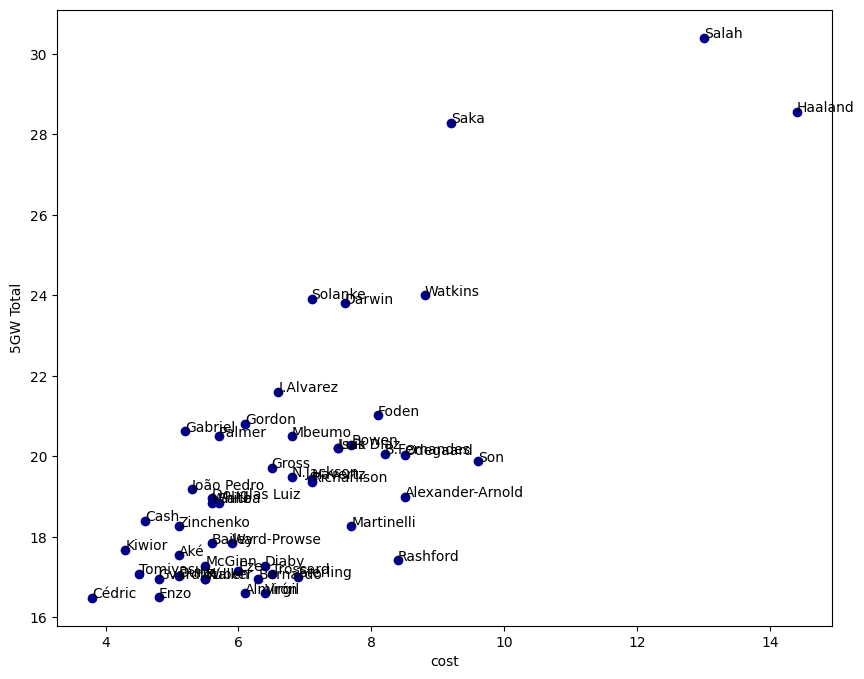

In [51]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=Top50['cost'],y=Top50['5GW Total'],c='DarkBlue')
# set labels
ax.set_xlabel('cost')
ax.set_ylabel('5GW Total')

# annotate points in axis
for idx, row in Top50.iterrows():
    ax.annotate(row['name'], (row['cost'], row['5GW Total']) )
# force matplotlib to draw the graph
plt.show()

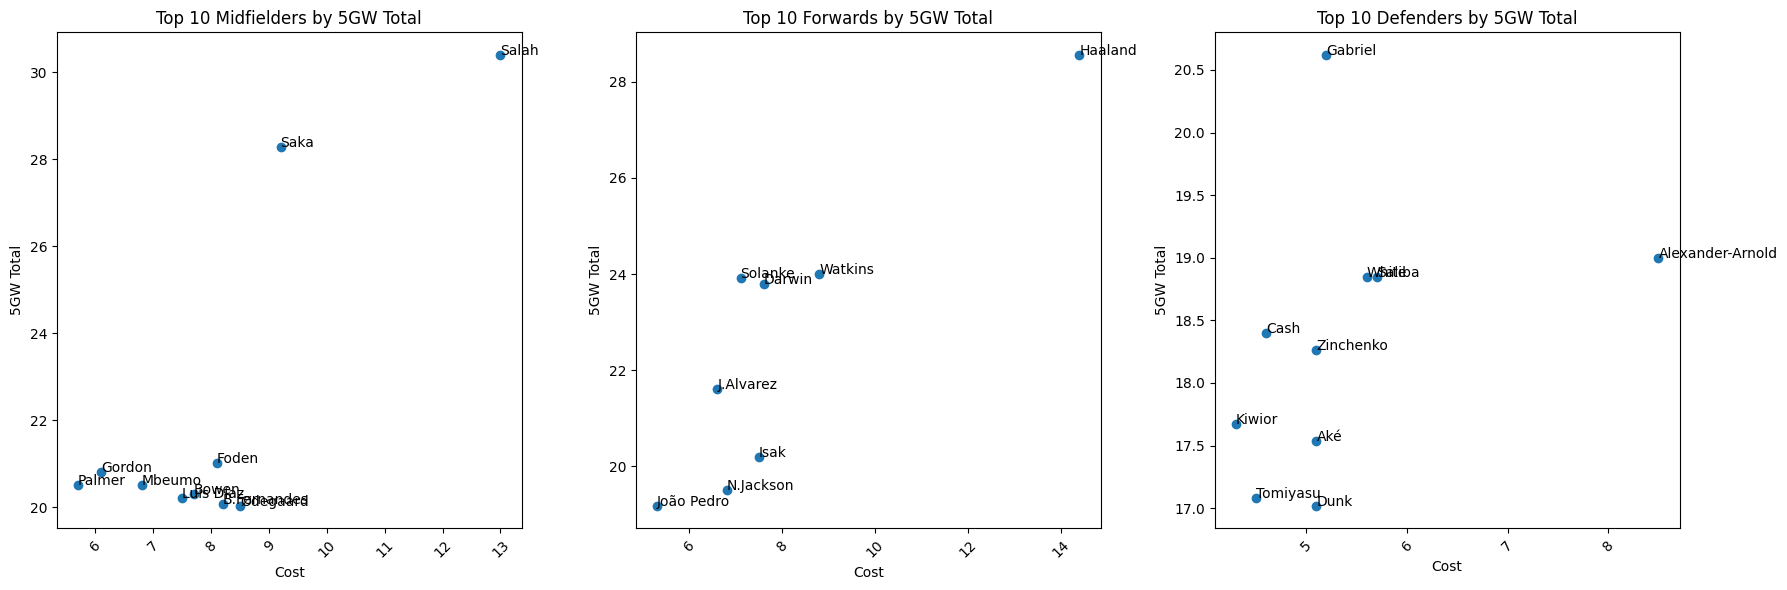

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Plotting the scatter plots
plt.figure(figsize=(18, 6))

# Midfielders scatter plot
plt.subplot(131)
plt.scatter(midfielders['cost'][:10], midfielders['5GW Total'][:10])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in midfielders.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

# Forwards scatter plot
plt.subplot(132)
plt.scatter(forwards['cost'][:10], forwards['5GW Total'][:10])
plt.title('Top 10 Forwards by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in forwards.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

# Defenders scatter plot
plt.subplot(133)
plt.scatter(defenders['cost'][:10], defenders['5GW Total'][:10])
plt.title('Top 10 Defenders by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in defenders.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

plt.tight_layout()
plt.show()


In [ ]:
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw26,gw27,gw28,gw29,gw30,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,1.2,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.8,2.7,4,4,210,121.3,...,1.2,3.1,NaN,3.10,3.54,3.21,3.21,2.99,16.05,9.85
2,13,Arsenal,F,Nketiah,5.1,3.6,5,4,197,73.0,...,1.2,2.8,NaN,2.80,3.12,2.88,2.88,2.72,14.40,8.80
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.2,2,1,72,20.8,...,1.1,2.2,NaN,2.26,2.26,2.22,2.22,2.26,11.22,6.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,1.0,1.9,-0.1,1.91,1.89,1.89,1.91,1.92,9.52,5.69
875,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0,0,60,5.7,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00
876,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00
877,569,Wolverhampton Wanderers,G,José Sá,5.0,1.7,0,0,372,52.3,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00


In [53]:
apiplayers = master

In [54]:
Mostselected = apiplayers.nlargest(20, 'selected_by_percent')
Mostselected

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue
507,355,Manchester City,F,Haaland,14.4,75.6,19.57,1.60,17,7,520,211.1,146,7.0,1742,2,3
17,19,Arsenal,M,Saka,9.2,64.7,11.18,8.46,13,8,587,274.2,169,6.8,2130,2,3
64,60,Aston Villa,F,Watkins,8.8,53.6,13.58,3.46,14,15,574,230.5,170,6.5,2299,2,3
596,430,Newcastle United,D,Trippier,6.9,41.8,0.58,6.89,1,10,569,179.2,107,4.5,2112,2,3
18,20,Arsenal,D,Saliba,5.7,39.0,1.54,0.69,2,1,510,71.2,104,4.0,2340,2,3
755,524,West Ham,G,Areola,4.2,35.4,0.00,0.00,0,0,430,69.3,86,3.7,2025,2,3
279,362,Chelsea,M,Palmer,5.7,34.0,8.00,4.69,10,7,416,158.7,124,5.6,1574,2,3
505,353,Manchester City,M,Foden,8.1,33.1,7.03,4.87,9,7,561,239.7,143,5.5,2130,2,3
502,349,Manchester City,M,De Bruyne,10.7,27.6,0.61,1.74,1,4,124,53.9,31,4.4,332,2,3
168,131,Brighton,D,Estupiñan,5.0,25.9,0.93,1.90,2,3,219,70.9,48,3.4,885,2,3


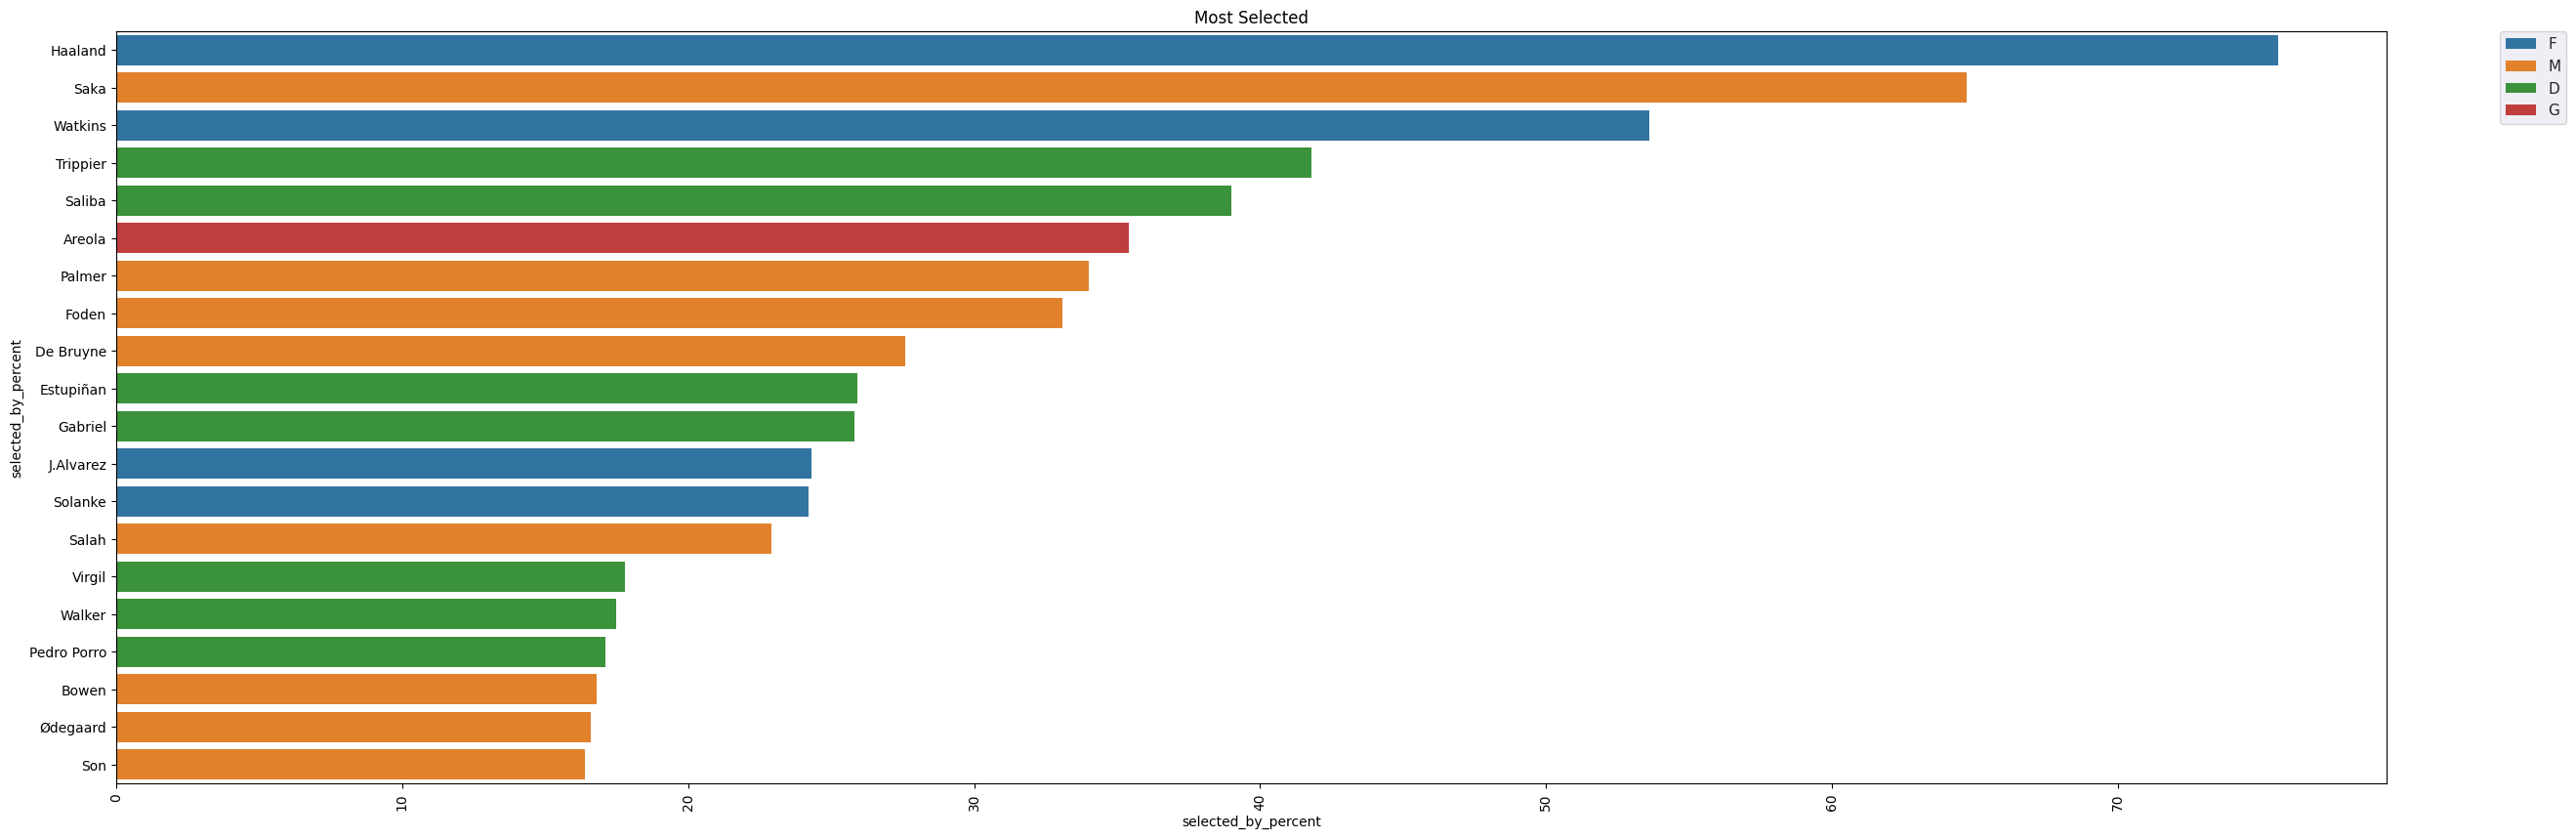

In [55]:
ax = sns.barplot(x='selected_by_percent', y='name', data=Mostselected, hue='pos', dodge=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Most Selected")
plt.xticks(rotation=90)
plt.ylabel("selected_by_percent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gcf().set_size_inches(30,10)

In [56]:
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltablexGxGc= epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc= epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc= epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc= epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc= epltablexGxGc.replace('Manchester Utd','Manchester United')
epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc= epltablexGxGc.replace('Nottham Forest','Nottingham Forest')
epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/21))
epltablexGxGc.rename(columns={'Squad': 'team'}, inplace=True)
epltablexGxGc['xG/90'] = (epltablexGxGc.xG / epltablexGxGc.MP)
epltablexGxGc['xGA/90'] = (epltablexGxGc.xGA / epltablexGxGc.MP)
epltablexGxGc

<ipython-input-56-ccafbf71d20a>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')


,Rk,team,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xCSP,xG/90,xGA/90
0,1,Liverpool,26,18,6,2,63,25,38,60,2.31,57.8,31.9,25.9,1.00,-2.076190,2.223077,1.226923
1,2,Manchester City,26,18,5,3,59,26,33,59,2.27,51.7,24.6,27.1,1.04,-0.685714,1.988462,0.946154
2,3,Arsenal,26,18,4,4,62,23,39,58,2.23,52.6,18.2,34.4,1.32,0.533333,2.023077,0.700000
3,4,Aston Villa,26,16,4,6,56,35,21,52,2.00,48.3,36.6,11.7,0.45,-2.971429,1.857692,1.407692
4,5,Tottenham,25,14,5,6,52,38,14,47,1.88,43.6,42.7,0.9,0.03,-4.133333,1.744000,1.708000
5,6,Manchester United,26,14,2,10,36,36,0,44,1.69,40.3,42.5,-2.2,-0.09,-4.095238,1.550000,1.634615
6,7,Brighton,26,10,9,7,49,41,8,39,1.50,43.6,36.7,6.9,0.27,-2.990476,1.676923,1.411538
7,8,West Ham,26,11,6,9,40,46,-6,39,1.50,34.9,47.1,-12.2,-0.47,-4.971429,1.342308,1.811538
8,9,Wolverhampton Wanderers,26,11,5,10,40,40,0,38,1.46,35.9,43.2,-7.3,-0.28,-4.228571,1.380769,1.661538
9,10,Newcastle United,26,11,4,11,54,45,9,37,1.42,48.3,46.4,1.9,0.07,-4.838095,1.857692,1.784615


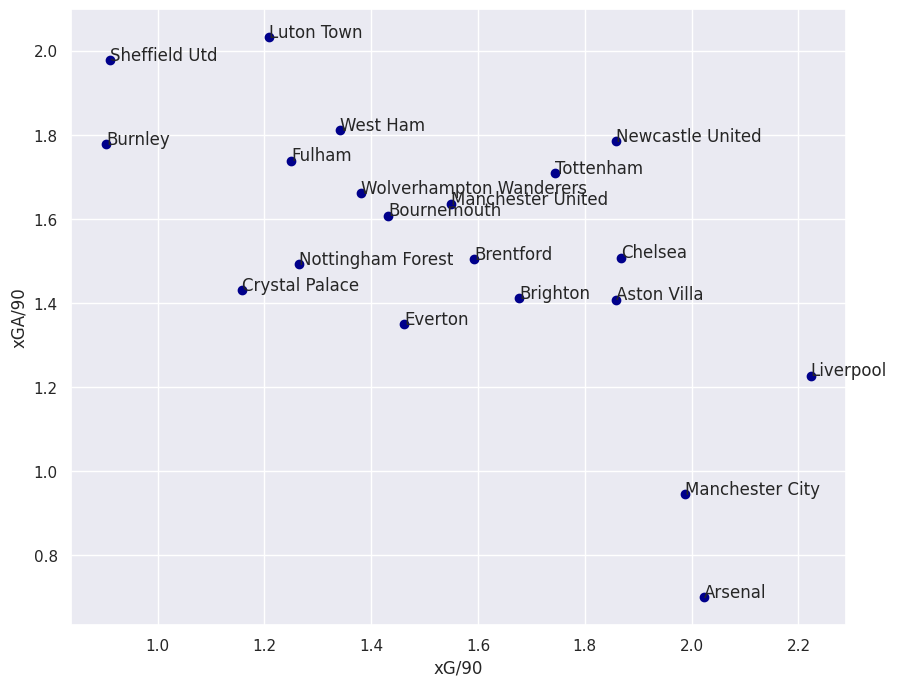

In [57]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=epltablexGxGc['xG/90'],y=epltablexGxGc['xGA/90'],c='DarkBlue')
# set labels
ax.set_xlabel('xG/90')
ax.set_ylabel('xGA/90')

# annotate points in axis
for idx, row in epltablexGxGc.iterrows():
    ax.annotate(row['team'], (row['xG/90'], row['xGA/90']) )
# force matplotlib to draw the graph
plt.show()

In [58]:
EPL_player_df

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup
0,8260,Erling Haaland,21,1759,17,21.168554455041885,5,3.889001840725541,87,22,...,87,22,1,0,F S,Manchester City,14,18.12387928366661,21.35706026107073,1.9017212595790625
1,1250,Mohamed Salah,21,1815,15,14.35135069489479,9,10.167602833360434,67,49,...,67,49,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894
2,1679,Dominic Solanke,25,2243,14,15.485817518085241,3,2.279703486710787,79,23,...,79,23,2,0,F,Bournemouth,13,14.724648665636778,15.772489465773106,2.205134676769376
3,1776,Jarrod Bowen,25,2250,14,10.528724770992994,2,3.410887574777007,63,17,...,63,17,2,0,F M,West Ham,14,10.528724770992994,12.524612214416265,2.195778287947178
4,8865,Ollie Watkins,26,2319,14,15.573091946542263,10,5.876053761690855,80,37,...,80,37,4,0,F,Aston Villa,14,15.573091946542263,23.121730595827103,3.589499603956938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,12408,Daniel Muñoz,4,360,0,0.21003219485282898,0,0.3155568391084671,2,6,...,2,6,2,0,D,Crystal Palace,0,0.21003219485282898,0.5058322548866272,0.09529111161828041
537,12409,Adam Wharton,4,311,0,0.03643640875816345,0,0.5562272667884827,1,7,...,1,7,1,0,M S,Crystal Palace,0,0.03643640875816345,0.688779104501009,0.5098360702395439
538,12412,Morgan Rogers,2,6,0,0.25999318063259125,0,0,2,0,...,2,0,0,0,S,Aston Villa,0,0.25999318063259125,0.25999318063259125,0
539,12418,Rodrigo Ribeiro,1,1,0,0,0,0,0,0,...,0,0,0,0,S,Nottingham Forest,0,0,0,0


In [59]:
EPL_player_df['goals'] = EPL_player_df['goals_1wks_x'].astype(int)
top25goals = EPL_player_df.nlargest(20, 'goals')
top25goals

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup,goals
0,8260,Erling Haaland,21,1759,17,21.168554455041885,5,3.889001840725541,87,22,...,22,1,0,F S,Manchester City,14,18.12387928366661,21.35706026107073,1.9017212595790625,17
1,1250,Mohamed Salah,21,1815,15,14.35135069489479,9,10.167602833360434,67,49,...,49,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894,15
2,1679,Dominic Solanke,25,2243,14,15.485817518085241,3,2.279703486710787,79,23,...,23,2,0,F,Bournemouth,13,14.724648665636778,15.772489465773106,2.205134676769376,14
3,1776,Jarrod Bowen,25,2250,14,10.528724770992994,2,3.410887574777007,63,17,...,17,2,0,F M,West Ham,14,10.528724770992994,12.524612214416265,2.195778287947178,14
4,8865,Ollie Watkins,26,2319,14,15.573091946542263,10,5.876053761690855,80,37,...,37,4,0,F,Aston Villa,14,15.573091946542263,23.121730595827103,3.589499603956938,14
5,7322,Bukayo Saka,25,2170,13,12.197467006742954,6,8.36187432706356,75,61,...,61,3,0,F,Arsenal,9,9.152791693806648,22.339576855301857,9.946897875517607,13
6,453,Son Heung-Min,22,1851,12,7.47495724260807,6,7.489563323557377,52,40,...,40,1,0,F M S,Tottenham,11,6.713788405060768,17.716524586081505,6.9885916989296675,12
7,5232,Alexander Isak,18,1270,10,10.703782752156258,0,1.3759422898292542,39,12,...,12,0,0,F S,Newcastle United,8,9.181445017457008,11.599019698798656,2.939927790313959,10
8,6026,Richarlison,22,1381,10,9.048062501475215,3,1.6384554393589497,56,14,...,14,3,0,F M S,Tottenham,10,9.048062501475215,11.794333040714264,2.2480600606650114,10
9,8497,Cole Palmer,22,1579,10,8.33049844764173,6,5.819747157394886,48,32,...,32,7,0,F M S,"Chelsea,Manchester City",5,4.524654181674123,15.639502020552754,7.8472487181425095,10


In [60]:
EPL_player_df['assists'] = EPL_player_df['assists_1wks_x'].astype(int)
top25assists = EPL_player_df.nlargest(20, 'assists')
top25assists

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup,goals,assists
4,8865,Ollie Watkins,26,2319,14,15.573091946542263,10,5.876053761690855,80,37,...,4,0,F,Aston Villa,14,15.573091946542263,23.121730595827103,3.589499603956938,14,10
57,239,Pascal Groß,24,2090,4,5.004330199211836,10,7.234846423380077,45,72,...,4,0,D M S,Brighton,3,4.243161361664534,18.070677146315575,13.288625417277217,4,10
163,652,Kieran Trippier,24,2129,1,0.5851622633635998,10,8.480502588674426,7,64,...,5,0,D,Newcastle United,1,0.5851622633635998,13.785565685480833,10.326701235026121,1,10
1,1250,Mohamed Salah,21,1815,15,14.35135069489479,9,10.167602833360434,67,49,...,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894,15,9
124,6382,Pedro Neto,17,1425,2,3.1913340650498867,9,5.216042526066303,34,37,...,4,0,F M S,Wolverhampton Wanderers,2,3.1913340650498867,8.646349404007196,2.189656473696232,2,9
11,6055,Phil Foden,26,2140,9,7.770703447982669,7,6.241422824561596,74,55,...,1,0,F M S,Manchester City,9,7.770703447982669,21.064945980906487,12.133457189425826,9,7
15,10720,Darwin Núñez,24,1470,9,14.789846272207797,7,4.797008647583425,79,26,...,8,0,F S,Liverpool,9,14.02867737505585,18.9889096878469,3.0453371480107307,9,7
18,5221,Leon Bailey,24,1286,8,4.426404682919383,7,6.606608618050814,39,31,...,3,0,M S,Aston Villa,8,4.426404682919383,13.538945369422436,5.520006403326988,8,7
54,9524,Anthony Elanga,25,1716,5,5.047331048175693,7,5.319317042827606,43,24,...,1,0,F M S,Nottingham Forest,5,5.047331048175693,12.871075671166182,3.322338193655014,5,7
356,6912,Pedro Porro,23,2070,0,2.0977757312357426,7,5.757544359192252,37,40,...,3,0,D,Tottenham,0,2.0977757312357426,13.497159967198968,10.500741556286812,0,7


In [61]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [62]:
fig3= go.Figure()
fig3.add_trace(go.Scatter(x = top25goals["goals"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'goals'))
fig3.add_trace(go.Scatter(x = top25goals["xG_1wks_x"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xG'))
for i in range(0, len(top25goals)):
               fig3.add_shape(type='line',
                              x0 = top25goals["goals"][i],
                              y0 = i,
                              x1 = top25goals["xG_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig3.update_layout(title_text =
                    "Goals vs xG",
                    title_font_size = 30)
fig3.update_xaxes(range=[0, 30])
fig3.show()

In [63]:
seasonedit = one_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])

In [64]:
top25assists.columns

Index(['id', 'player_name', 'games_x', 'time_x', 'goals_1wks_x', 'xG_1wks_x',
       'assists_1wks_x', 'xA_1wks_x', 'shots_1wks_x', 'key_passes_1wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_1wks_x', 'npxG_1wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_1wks_y', 'xG_1wks_y', 'assists_1wks_y', 'xA_1wks_y',
       'shots_1wks_y', 'key_passes_1wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_1wks_y', 'npxG_1wks_y', 'xGChain',
       'xGBuildup', 'goals', 'assists'],
      dtype='object')

In [65]:
top20assists = top25assists.drop(columns=[ 'shots_1wks_x', 'key_passes_1wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_1wks_x', 'npxG_1wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_1wks_y', 'xG_1wks_y', 'assists_1wks_y', 'xA_1wks_y',
       'shots_1wks_y', 'key_passes_1wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_1wks_y', 'npxG_1wks_y', 'xGChain',
       'xGBuildup', 'assists_1wks_x', 'games_x', 'time_x', 'goals_1wks_x', 'id' ])

top20assists.reset_index(inplace = True,drop = True)
top20assists

,player_name,xG_1wks_x,xA_1wks_x,goals,assists
0,Ollie Watkins,15.573091946542263,5.876053761690855,14,10
1,Pascal Groß,5.004330199211836,7.234846423380077,4,10
2,Kieran Trippier,0.5851622633635998,8.480502588674426,1,10
3,Mohamed Salah,14.35135069489479,10.167602833360434,15,9
4,Pedro Neto,3.1913340650498867,5.216042526066303,2,9
5,Phil Foden,7.770703447982669,6.241422824561596,9,7
6,Darwin Núñez,14.789846272207797,4.797008647583425,9,7
7,Leon Bailey,4.426404682919383,6.606608618050814,8,7
8,Anthony Elanga,5.047331048175693,5.319317042827606,5,7
9,Pedro Porro,2.0977757312357426,5.757544359192252,0,7


In [66]:
fig4= go.Figure()
fig4.add_trace(go.Scatter(x = top20assists["assists"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'assists'))
fig4.add_trace(go.Scatter(x = top20assists["xA_1wks_x"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xA'))
for i in range(0, len(top20assists)):
               fig4.add_shape(type='line',
                              x0 = top20assists['assists'][i],
                              y0 = i,
                              x1 = top20assists["xA_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig4.update_layout(title_text =
                    "assists vs xA",
                    title_font_size = 15)
fig4.update_xaxes(range=[0, 15])
fig4.show()

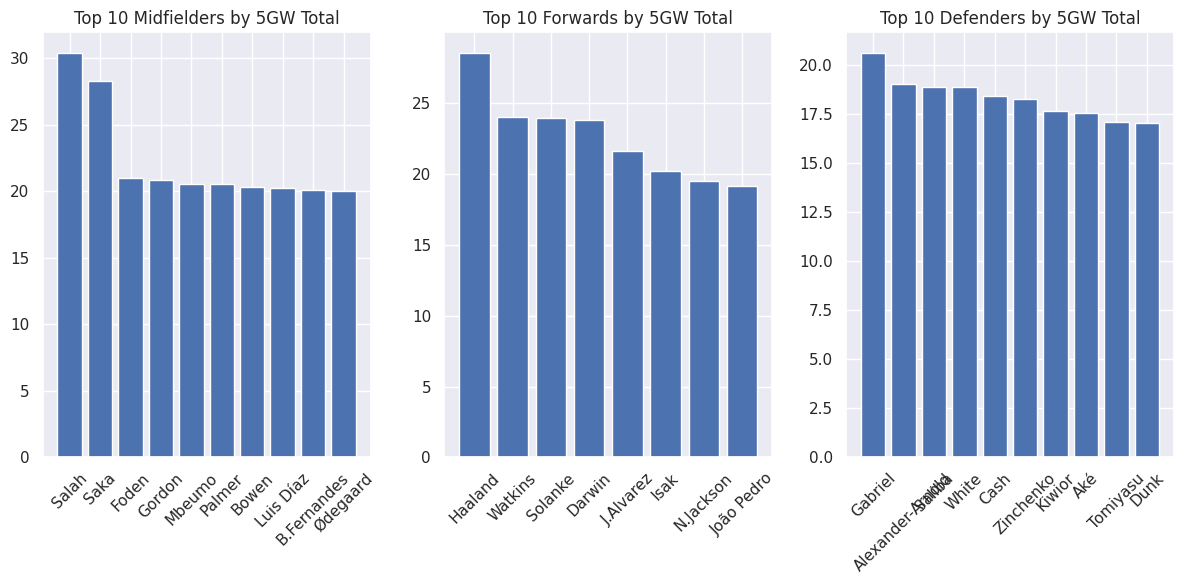

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Sort the filtered DataFrames by '5GW Total' in descending order
midfielders = midfielders.sort_values(by='5GW Total', ascending=False)
forwards = forwards.sort_values(by='5GW Total', ascending=False)
defenders = defenders.sort_values(by='5GW Total', ascending=False)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Midfielders chart
plt.subplot(131)
plt.bar(midfielders['name'][:10], midfielders['5GW Total'][:10])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xticks(rotation=45)

# Forwards chart
plt.subplot(132)
plt.bar(forwards['name'][:10], forwards['5GW Total'][:10])
plt.title('Top 10 Forwards by 5GW Total')
plt.xticks(rotation=45)

# Defenders chart
plt.subplot(133)
plt.bar(defenders['name'][:10], defenders['5GW Total'][:10])
plt.title('Top 10 Defenders by 5GW Total')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


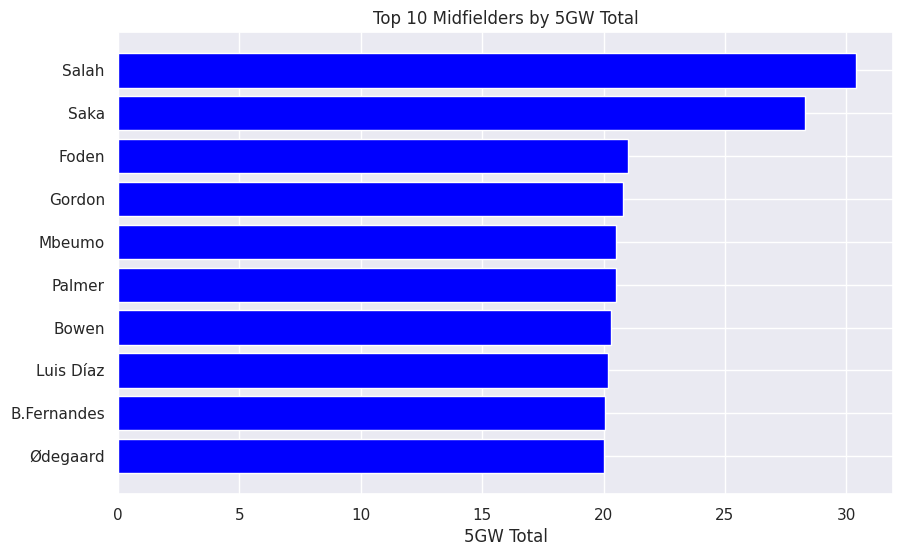

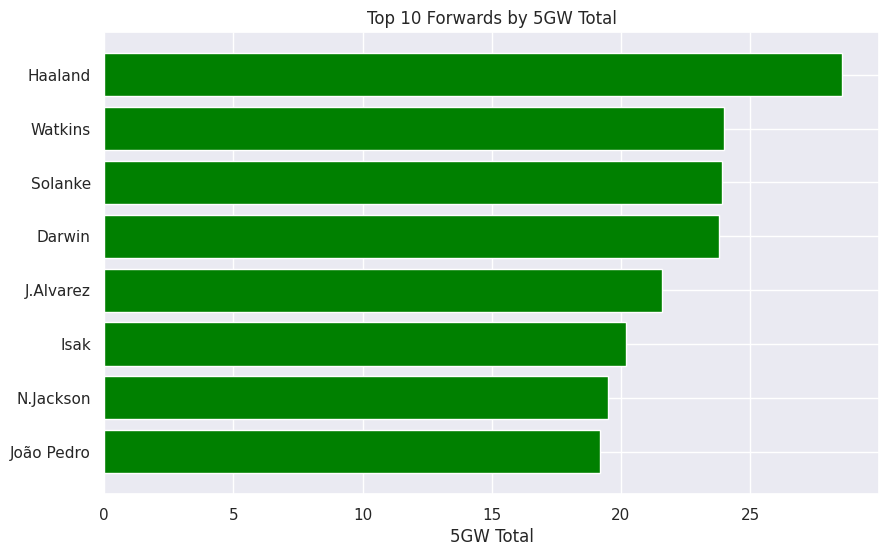

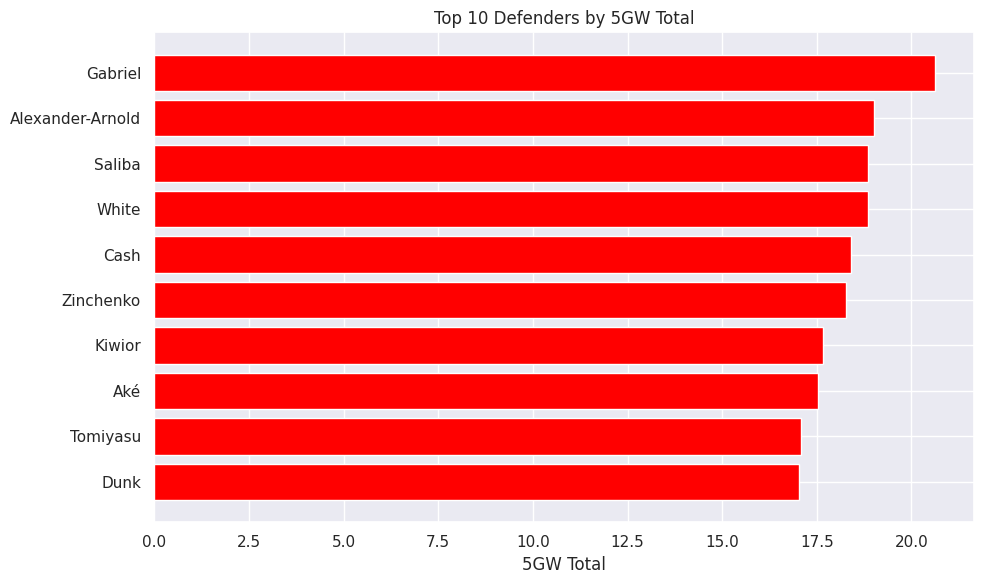

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Sort the filtered DataFrames by '5GW Total' in descending order
midfielders = midfielders.sort_values(by='5GW Total', ascending=False)
forwards = forwards.sort_values(by='5GW Total', ascending=False)
defenders = defenders.sort_values(by='5GW Total', ascending=False)

# Create a list of colors for each chart
colors = ['blue', 'green', 'red']

# Plotting the horizontal bar charts with different colors
plt.figure(figsize=(10, 6))

# Midfielders chart
plt.barh(midfielders['name'][:10], midfielders['5GW Total'][:10], color=colors[0])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

# Forwards chart
plt.figure(figsize=(10, 6))
plt.barh(forwards['name'][:10], forwards['5GW Total'][:10], color=colors[1])
plt.title('Top 10 Forwards by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

# Defenders chart
plt.figure(figsize=(10, 6))
plt.barh(defenders['name'][:10], defenders['5GW Total'][:10], color=colors[2])
plt.title('Top 10 Defenders by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

plt.tight_layout()
plt.show()


In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments26'

# Sort the DataFrame by values in descending order
gw25adjustments_sorted = gw25adjustments.sort_values(by=gw25adjustments.columns[0], ascending=False)

# Define custom color map with red, orange, and green
custom_colors = ["#FF0000", "#FFA500", "#00FF00"]
custom_cmap = sns.color_palette(custom_colors, as_cmap=True)

# Plot the heatmap with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(gw25adjustments_sorted, annot=True, cmap=custom_cmap, center=1,
            vmin=0.9, vmax=1.1, cbar_kws={'ticks': [0.9, 1, 1.1], 'format': '%.1f'})
plt.title('Color-Coded Table of GW Adjustments (Custom Colors)')
plt.show()



NameError: name 'gw25adjustments' is not defined

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments21'

# Sort the DataFrame by values in descending order
gw21adjustments_sorted = gw21adjustments.sort_values(by='gw21adjustment', ascending=False)

# Define custom color map with red, orange, and green
custom_colors = ["#FF0000", "#FFA500", "#00FF00"]
custom_cmap = sns.color_palette(custom_colors)

# Set the figure size
plt.figure(figsize=(10, 6))

scores_columns = ['gw21adjustment', 'gw22adjustment', 'gw23adjustment', 'gw24adjustment', 'gw25adjustment']

bottom = [0] * len(gw21adjustments_sorted)

for i, score_col in enumerate(scores_columns):
    plt.bar(gw21adjustments_sorted.index, gw21adjustments_sorted[score_col], bottom=bottom, label=score_col, color=custom_cmap[i])
    bottom += gw21adjustments_sorted[score_col]

plt.xlabel('Teams')
plt.ylabel('Score Adjustments')
plt.title('Stacked GW Adjustments for Different Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


NameError: name 'gw21adjustments' is not defined

In [71]:
gw21adjustments_sorted = gw21adjustments.sort_values(by='gw21adjustment', ascending=False)


NameError: name 'gw21adjustments' is not defined

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Calculate the total score adjustments for each team
gw21adjustments['Total'] = gw21adjustments.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
gw21adjustments = gw21adjustments.sort_values(by='Total', ascending=False)

# Get the scores columns
scores_columns = ['gw22adjustments', 'gw23adjustments', 'gw24adjustments', 'gw25adjustments']

bottom = [0] * len(gw21adjustments)

for score_col in scores_columns:
    plt.bar(gw21adjustments.index, gw21adjustments[score_col], bottom=bottom, label=score_col)
    bottom += gw21adjustments[score_col]

plt.xlabel('Teams')
plt.ylabel('Score adjustments')
plt.title('Stacked GW adjustments for Different Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


NameError: name 'gw21adjustments' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
gw23adjustment

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments26'

# Set the index column
gwadjustments26.set_index('team', inplace=True)

# Create a custom color map
cmap = sns.diverging_palette(240, 10, n=21, as_cmap=True)
colors = ['red', 'orange', 'green']

# Define color thresholds
color_thresholds = [0.9, 1.1, 2.0]

# Normalize values for coloring
normalized_values = (gwadjustments26 - 0.9) / (2.0 - 0.9)

# Apply color map and thresholds
colored_values = pd.cut(normalized_values, bins=color_thresholds, labels=colors)

# Plot the heatmap with customized color coding
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_values, annot=True, cmap=cmap, center=1, cbar=False, fmt=".2f", linewidths=0.5, linecolor='white')
plt.title('Custom Color-Coded Table of GW Adjustments')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))

# Calculate the total score adjustments for each team
gwadjustments26['Total'] = gwadjustments26.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
gwadjustments26 = gwadjustments26.sort_values(by='Total', ascending=False)

# Get the scores columns
scores_columns = ['gw2adjustment', 'gw3adjustment', 'gw4adjustment', 'gw5adjustment', 'gw6adjustment']

# Define color thresholds and corresponding colors
color_thresholds = [0.9, 1.1, 2.0]
colors = ['red', 'orange', 'green']

bottom = [0] * len(gwadjustments26)

for score_col in scores_columns:
    adjusted_values = gwadjustments26[score_col]

    # Create a color list based on thresholds
    colors_for_col = [colors[-1] if val is None else
                      colors[0] if val < color_thresholds[0] else
                      colors[1] if val <= color_thresholds[1] else
                      colors[2]
                      for val in adjusted_values]

    for i, (val, color) in enumerate(zip(adjusted_values, colors_for_col)):
        plt.barh(gwadjustments26.index[i], val, color=color, edgecolor='white')

    bottom += adjusted_values

plt.xlabel('Score Adjustments')
plt.ylabel('Teams')
plt.title('Horizontally Stacked GW Adjustments for Different Teams')
plt.legend(labels=scores_columns)
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top
plt.tight_layout()

plt.show()


In [73]:
import requests
import pandas as pd
from urllib.request import urlopen
from json import loads
from csv import writer

def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map.get(team_id, None)  # Use get to handle missing team IDs

def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map.get(position, None)  # Use get to handle missing positions

def main():
    team_entry_id = 6388102
    url = f'https://fantasy.premierleague.com/api/entry/{team_entry_id}/transfers'

    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP errors

        transfers_data = response.json()

        # Get player names from the provided API
        player_ids_in = [transfer['element_in'] for transfer in transfers_data]
        player_ids_out = [transfer.get('element_out', None) for transfer in transfers_data]

        all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
        players = all_data["elements"]

        # Build a dictionary of player names for players transferred in
        player_names_in = {}
        for player in players:
            if player['id'] in player_ids_in:
                player_names_in[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Build a dictionary of player names for players transferred out
        player_names_out = {}
        for player in players:
            if player['id'] in player_ids_out:
                player_names_out[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Replace player IDs with names and add additional data
        transfer_data_with_info = []
        for transfer in transfers_data:
            player_in_name = player_names_in.get(transfer['element_in'], 'Unknown Player')
            player_out_name = player_names_out.get(transfer['element_out'], 'Unknown Player') if transfer['element_out'] is not None else 'N/A'
            transfer_info = {
                'week': transfer['event'],
                'player_in': player_in_name,
                'player_out': player_out_name,
                'cost_in': transfer['element_in_cost'] / 10,  # Convert to actual cost
                'cost_out': transfer.get('element_out_cost', 0) / 10  # Convert to actual cost
            }
            transfer_data_with_info.append(transfer_info)

        # Create a DataFrame
        df = pd.DataFrame(transfer_data_with_info)

        print("Transfers made by team entry", team_entry_id)
        print(df)

    except requests.exceptions.HTTPError as errh:
        print("HTTP Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout error:", errt)
    except requests.exceptions.RequestException as err:
        print("An error occurred:", err)

if __name__ == "__main__":
    main()



Transfers made by team entry 6388102
    week                           player_in  \
0     26                      Hwang Hee-chan   
1     26                     Martin Ødegaard   
2     25                   Caoimhin Kelleher   
3     24                     Virgil van Dijk   
4     24             Diogo Teixeira da Silva   
5     22                      Erling Haaland   
6     22                        Eberechi Eze   
7     21              Richarlison de Andrade   
8     20                          Phil Foden   
9     19                 Oleksandr Zinchenko   
10    18                       Son Heung-min   
11    17                     Dominic Solanke   
12    17                      Julián Álvarez   
13    16                         Cole Palmer   
14    15               Konstantinos Tsimikas   
15    14  Bernardo Veiga de Carvalho e Silva   
16    13                  Morgan Gibbs-White   
17    13                        Eberechi Eze   
18    12        Gabriel dos Santos Magalhães   
19 

In [74]:
import requests
import pandas as pd
from urllib.request import urlopen
from json import loads
from csv import writer

def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map.get(team_id, None)  # Use get to handle missing team IDs

def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map.get(position, None)  # Use get to handle missing positions

def main():
    team_entry_id = 275269
    url = f'https://fantasy.premierleague.com/api/entry/{team_entry_id}/transfers'

    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP errors

        transfers_data = response.json()

        # Get player names from the provided API
        player_ids_in = [transfer['element_in'] for transfer in transfers_data]
        player_ids_out = [transfer.get('element_out', None) for transfer in transfers_data]

        all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
        players = all_data["elements"]

        # Build a dictionary of player names for players transferred in
        player_names_in = {}
        for player in players:
            if player['id'] in player_ids_in:
                player_names_in[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Build a dictionary of player names for players transferred out
        player_names_out = {}
        for player in players:
            if player['id'] in player_ids_out:
                player_names_out[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Replace player IDs with names and add additional data
        transfer_data_with_info = []
        for transfer in transfers_data:
            player_in_name = player_names_in.get(transfer['element_in'], 'Unknown Player')
            player_out_name = player_names_out.get(transfer['element_out'], 'Unknown Player') if transfer['element_out'] is not None else 'N/A'
            transfer_info = {
                'week': transfer['event'],
                'player_in': player_in_name,
                'player_out': player_out_name,
                'cost_in': transfer['element_in_cost'] / 10,  # Convert to actual cost
                'cost_out': transfer.get('element_out_cost', 0) / 10  # Convert to actual cost
            }
            transfer_data_with_info.append(transfer_info)

        # Create a DataFrame
        df = pd.DataFrame(transfer_data_with_info)

        print("Transfers made by team entry", team_entry_id)
        print(df)

    except requests.exceptions.HTTPError as errh:
        print("HTTP Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout error:", errt)
    except requests.exceptions.RequestException as err:
        print("An error occurred:", err)

if __name__ == "__main__":
    main()


Transfers made by team entry 275269
    week                     player_in                    player_out  cost_in  \
0     26                Hwang Hee-chan       Diogo Teixeira da Silva      5.6   
1     26                William Saliba           Oleksandr Zinchenko      5.7   
2     24       Diogo Teixeira da Silva                  Eberechi Eze      8.2   
3     24                 Alfie Doughty               Kieran Trippier      4.6   
4     23                Erling Haaland                Julián Álvarez     14.0   
5     21        Bruno Borges Fernandes                 Mohamed Salah      8.2   
6     20        Richarlison de Andrade                 Son Heung-min      6.8   
7     19                   Kyle Walker         Konstantinos Tsimikas      5.3   
8     18               Martin Dubravka               Alphonse Areola      4.2   
9     17               Dominic Solanke                Cameron Archer      6.6   
10    16                   Cole Palmer                  Bryan Mbeumo     

In [75]:
import pandas as pd

fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc = epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc = epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc = epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc = epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc = epltablexGxGc.replace('Manchester Utd','Manchester United')

epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc = epltablexGxGc.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/23))
epltablexGxGc.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the new dataframe "XGD current season"
xgd_current_season = epltablexGxGc[['Team', 'xGD']]

# Displaying the new dataframe
xgd_current_season

<ipython-input-75-4cad6975eacd>:18: FutureWarning:

The default value of regex will change from True to False in a future version.



,Team,xGD
0,Liverpool,25.9
1,Manchester City,27.1
2,Arsenal,34.4
3,Aston Villa,11.7
4,Tottenham,0.9
5,Manchester United,-2.2
6,Brighton,6.9
7,West Ham,-12.2
8,Wolverhampton Wanderers,-7.3
9,Newcastle United,1.9


In [76]:
import pandas as pd

# Fetching data for XGD current season
fbref_current_season = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable_current_season = fbref_current_season[0]
epltablexGxGc_current_season = epltable_current_season.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Leeds United','Leeds')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Leicester City','Leicester')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Manchester Utd','Manchester United')

epltablexGxGc_current_season['Squad'] = epltablexGxGc_current_season['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc_current_season.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the XGD current season dataframe
xgd_current_season = epltablexGxGc_current_season[['Team', 'xGD/90']]

# Fetching data for XGD Last season
fbref_last_season = pd.read_html('https://fbref.com/en/comps/9/2022-2023/2022-2023-Premier-League-Stats')
epltable_last_season = fbref_last_season[0]
epltablexGxGc_last_season = epltable_last_season.drop(columns=[
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Leeds United','Leeds')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Leicester City','Leicester')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Manchester Utd','Manchester United')

epltablexGxGc_last_season['Squad'] = epltablexGxGc_last_season['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc_last_season.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the XGD Last season dataframe
xgd_last_season = epltablexGxGc_last_season[['Team', 'xGD/90']]

# Merging the two dataframes
merged_df = pd.merge(xgd_current_season, xgd_last_season, on='Team', suffixes=('_current', '_last'), how='outer')
merged_df.fillna(0, inplace=True)

# Displaying the merged dataframe
merged_df_filtered = merged_df.copy()

# Drop rows containing "Leicester", "Leeds", and "Southampton" from the filtered DataFrame
merged_df_filtered = merged_df_filtered[~merged_df_filtered['Team'].isin(['Leicester', 'Leeds', 'Southampton'])]
merged_df_filtered

<ipython-input-76-e4d7973268db>:19: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-76-e4d7973268db>:42: FutureWarning:

The default value of regex will change from True to False in a future version.



,Team,xGD/90_current,xGD/90_last
0,Liverpool,1.00,0.57
1,Manchester City,1.04,1.22
2,Arsenal,1.32,0.79
3,Aston Villa,0.45,-0.06
4,Tottenham,0.03,0.20
5,Manchester United,-0.09,0.45
6,Brighton,0.27,0.61
7,West Ham,-0.47,-0.10
8,Wolverhampton Wanderers,-0.28,-0.61
9,Newcastle United,0.07,0.85


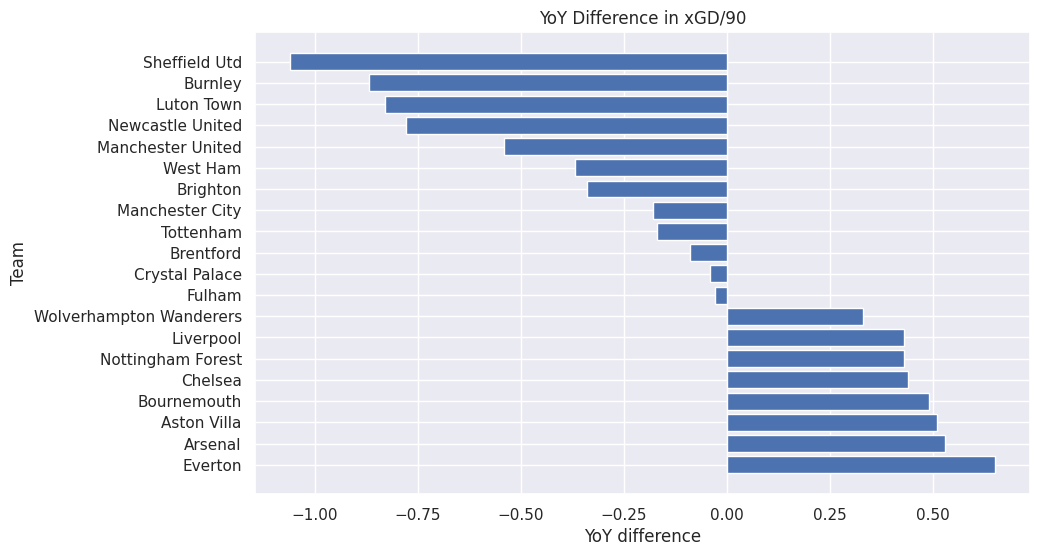

In [77]:
import matplotlib.pyplot as plt

# Create the YoY difference column
merged_df_filtered['YoY difference'] = merged_df_filtered['xGD/90_current'] - merged_df_filtered['xGD/90_last']

# Sort the DataFrame by YoY difference in descending order
merged_df_filtered_sorted = merged_df_filtered.sort_values('YoY difference', ascending=False)

# Generate the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df_filtered_sorted['Team'], merged_df_filtered_sorted['YoY difference'])
plt.xlabel('YoY difference')
plt.ylabel('Team')
plt.title('YoY Difference in xGD/90')
plt.show()

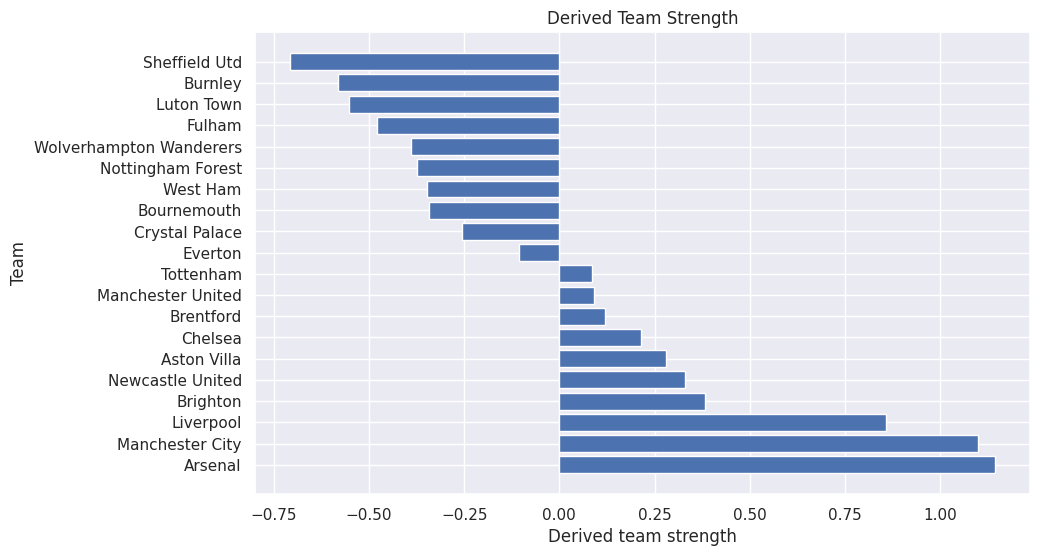

In [78]:
import matplotlib.pyplot as plt

# Create the Derived team strength column
merged_df_filtered['Derived team strength'] = (2/3) * merged_df_filtered['xGD/90_current'] + (1/3) * merged_df_filtered['xGD/90_last']

# Sort the DataFrame by Derived team strength in descending order
merged_df_filtered_sorted = merged_df_filtered.sort_values('Derived team strength', ascending=False)

# Generate the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df_filtered_sorted['Team'], merged_df_filtered_sorted['Derived team strength'])
plt.xlabel('Derived team strength')
plt.ylabel('Team')
plt.title('Derived Team Strength')
plt.show()

In [ ]:
merged_df_filtered

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1 17:50:36 2020
@author: doug hagey
"""

import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '310',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    return(player_df)

#Creprint('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')

print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')

print('Merging Tables')
EPL_player_df = pd.merge(five_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, five_game_df, on=['id','player_name'])


print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined 2021.csv', encoding='utf-8', index=False)


# Assuming you have a DataFrame named EPL_player_df

# Extract relevant columns
selected_columns = ['player_name', 'xG_5wks_x', 'xA_5wks_x']
subset_df = EPL_player_df[selected_columns]

# Rename columns
subset_df.rename(columns={'xG_5wks_x': 'xG 5 Weeks', 'xA_5wks_x': 'xA 5 Weeks'}, inplace=True)

# Round the numbers to 2 decimal places
subset_df = subset_df.round(2)

# Sort by xG 5 Weeks in descending order
top_10_xG = subset_df.sort_values(by='xG 5 Weeks', ascending=False).head(10)

# Sort by xA 5 Weeks in descending order
top_10_xA = subset_df.sort_values(by='xA 5 Weeks', ascending=False).head(10)

# Display the top 10 for xG 5 Weeks
print("Top 10 for xG 5 Weeks:")
print(top_10_xG)

# Display the top 10 for xA 5 Weeks
print("\nTop 10 for xA 5 Weeks:")
print(top_10_xA)



In [ ]:
# Extract relevant columns
selected_columns_xG = ['team_name', 'xG_5wks']
selected_columns_xGA = ['team_name', 'xGA_5wks']

# Rename columns
subset_xG = season_df[selected_columns_xG].rename(columns={'xG_5wks': 'xG 5 Weeks'})
subset_xGA = season_df[selected_columns_xGA].rename(columns={'xGA_5wks': 'xGA 5 Weeks'})

# Sort by xG 5 Weeks and xGA 5 Weeks respectively
top_xG = subset_xG.sort_values(by='xG 5 Weeks', ascending=False).head(10)
top_xGA = subset_xGA.sort_values(by='xGA 5 Weeks', ascending=False).head(10)

# Display the top 10 for xG 5 Weeks
print("Top 10 teams with the highest xG over the last 5 games:")
print(top_xG)

# Display the top 10 for xGA 5 Weeks
print("\nTop 10 teams with the highest xGA over the last 5 games:")
print(top_xGA)


In [ ]:
import pandas as pd

# Your list of values
values = [0.91, 0.326666667, 1.073333333, 0.93, 0.08, -0.286666667, 0.383333333, 0.036666667, 0.476666667, 0.326666667, -0.416666667, -0.376666667, -0.486666667, -0.21, -0.453333333, 0.32, -0.1, -0.68, -0.566666667, -0.786666667]

# Update the existing dataframe
merged_df_filtered['Derived team strength'] = values

# Set the desired range
new_min = 0.5
new_max = 1.5

# Scale the values
min_value = merged_df_filtered['Derived team strength'].min()
max_value = merged_df_filtered['Derived team strength'].max()

merged_df_filtered['Derived team strength'] = ((merged_df_filtered['Derived team strength'] - min_value) * (new_max - new_min) / (max_value - min_value)) + new_min

# Display the updated dataframe
merged_df_filtered
